# **Stage 0**

## Problem Statement

Bank ABC adalah salah satu bank di Portugal yang ingin menawarkan produk deposito berjangka ke nasabahnya. Penawaran tersebut dilakukan secara langsung melalui telepon (telemarketing).
* Convertion rate nasabah yang menyetujui penawaran deposito berjangka yang kurang maksimal yaitu hanya 11,7% sehingga dinilai kurang efektif.
* Campaign Cost yang dikeluarkan oleh bank untuk menawarkan deposito berjangka cukup besar sekitar 348.124 Euro

## Goal

* Meningkatkan Conversion Rate
* Menurunkan Campaign Cost

## Objective

1. Membuat model untuk mendeteksi user-user yang berpotensi membuka rekening deposito berjangka agar user-user tersebut lebih diprioritaskan dalam melakukan telemarketing.
2. Memberikan rekomendasi bisnis dan rekomendasi nasabah yang berpotensi kepada pihak marketing

## Business Metrics

* Conversion Rate
* Profit

# Stage 1 : EDA, Insights and Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.style as style
import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import rcParams
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Data Exploration

### Tentang Data

Projek ini menggunakan dua dataset, yaitu:

- train.csv: teridiri dari 45.211 baris dan 17 kolom diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010)
- test.csv: teridiri dari 4521 baris dan 17 kolom, dipilih secara acak dari train.csv

### Deskripsi Kolom
**Data Klien Bank**
- age: usia (numerikal)
- job: jenis pekerjaan (kategorikal: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: status pernikahan (kategorikal: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: tingkat pendidikan (kategorikal: primary, secondary, tertiary and unknown)
- default: memiliki kredit sebelumnya? (kategorikal: 'no','yes','unknown')
- housing: memiliki cicilan rumah? (kategorikal: 'no','yes','unknown')
- loan: memiliki pinjaman pribadi? (kategorikal: 'no','yes','unknown')
- balance: saldo individual.

**Terkait dengan kontak terakhir dari kampanye saat ini**
- contact: jenis komunikasi ketika dihubungi (kategorikal: "unknown","telephone","cellular")
- day: hari atau tanggal terakhir dihubungi (numerikal)
- month: bulan terakhir dihubungi (kategorikal: "jan", "feb", "mar", …, "nov", "dec")
- duration: durasi kontak terakhir, dalam detik (numeric)

**Kolom lainnya**
- campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerikal)
- pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerikal, -1 berarti klien belum dihubungi sebelumnya)
- previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerikal)
- poutcome: hasil dari kampanye pemasaran sebelumnya (kategorikal: "unknown","other","failure","success")

**Variabel Ouput (target yang akan diprediksi):**
- y: apakah klien berlangganan deposito berjangka? (biner: "yes","no")

## Load Dataset

In [3]:
## data train
df_train = pd.read_csv('train.csv',sep=';')

In [4]:
df_train.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
## data test
df_test = pd.read_csv('test.csv',sep=';')

In [6]:
df_test.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3654,30,management,single,tertiary,no,2,no,no,cellular,16,jun,102,1,85,1,failure,no
3756,42,services,married,secondary,no,96,yes,no,cellular,5,may,238,3,340,2,failure,no
2250,50,management,married,tertiary,no,207,yes,no,cellular,4,feb,99,1,-1,0,unknown,no
2621,24,blue-collar,single,unknown,no,431,yes,no,unknown,3,jun,108,12,-1,0,unknown,no
1474,44,admin.,divorced,secondary,no,432,no,no,cellular,9,feb,132,3,-1,0,unknown,no


In [7]:
# dataset size
print('Train data size: ', df_train.shape)
print('Test data size: ', df_test.shape)

Train data size:  (45211, 17)
Test data size:  (4521, 17)


`df_train` terdiri dari **45211** baris dan **17** kolom. Terdapat **10** categorical features (termasuk label) dan **7** numerical features.

## Exploratory Data Analysis

### Descriptive Statistics
Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:  
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai? **Semua tipe data sudah sesuai**<br>

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? **Tidak ada kolom yang memiliki nilai kosong**

C. Apakah ada kolom yang memiliki nilai summary agak aneh?
- Terdapat nilai mean dan median yang berbeda cukup signifikan diantaranya kolom `balance`, `duration`, dan `pdays`.
- Terdapat nilai min dan median yang cukup aneh untuk kolom `pdays`, dimana min dan mediannya bernilai `-1`. Setelah dilakukan pemeriksaan terhadap deskripsi kolom, untuk nasabah yang memiliki `pdays` bernilai `-1` merupakan nasabah yang belum pernah dihubungi oleh call center terkait telemarketing pada campaign sebelumnya.
- Terdapat nilai min yang cukup aneh untuk kolom `balance`, yaitu nilai min yang merupakan bilangan negatif. Berdasarkan deskripsi kolom, `balance` merupakan **saldo rata-rata tahunan**, secara logika hal ini cukup aneh apabila seorang nasabah memiliki saldo rata-rata tahunan yang bernilai negatif. Perlu dipastikan lagi apakah ini merupakan kesalahan pada input data, atau terdapat beberapa nasabah yang memanfaatkan fasilitas kredit.
- Terdapat kolom yang memiliki nilai standard deviasi cukup tinggi yaitu pada kolom `balance`.

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
#Jumlah Missing Value
df_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df_train.duplicated().any()

False

In [11]:
df_train['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [12]:
#Pemisahan data Yes Dan NO
df_yes=df_train[df_train['y']=='yes']
df_no=df_train[df_train['y']=='no']

In [13]:
#Pemisahan Kolom Berdasarakn Typedata (Numerik & Kategori)
nums=['age','balance','day','duration','campaign','pdays','previous']
cats=['job','marital','education','default','housing','loan','contact','month','poutcome','y']

Catatan : 
- Semua tipe data dan nama kolom sudah sesuai dengan valuenya.
- Tidak terdapat nilai kosong atau missing value.
- Tidak terdapat duplicated row
- Terdapat imbalance data user yang membuka deposito dan tidak membuka deposito

In [14]:
df_train[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Catatan : 
- Terdapat nilai mean dan median yang berbeda cukup signifikan diantaranya kolom `balance`, `duration`, dan `pdays`.
- Terdapat nilai min dan median yang cukup aneh untuk kolom `pdays`, dimana min dan mediannya bernilai `-1`. Setelah dilakukan pemeriksaan terhadap deskripsi kolom, untuk nasabah yang memiliki `pdays` bernilai `-1` merupakan nasabah yang belum pernah dihubungi oleh call center terkait telemarketing pada campaign sebelumnya.
- Terdapat nilai min yang cukup aneh untuk kolom `balance`, yaitu nilai min yang merupakan bilangan negatif. Berdasarkan deskripsi kolom, `balance` merupakan **saldo rata-rata tahunan**, secara logika hal ini cukup aneh apabila seorang nasabah memiliki saldo rata-rata tahunan yang bernilai negatif. Perlu dipastikan lagi apakah ini merupakan kesalahan pada input data, atau terdapat beberapa nasabah yang memanfaatkan fasilitas kredit.
- Terdapat kolom yang memiliki nilai standard deviasi cukup tinggi yaitu pada kolom `balance`.

In [15]:
df_train[nums].mode()

,age,balance,day,duration,campaign,pdays,previous
0,32,0,20,124,1,-1,0


Dari informasi di atas diperoleh bahwa:
1. Usia client yang paling banyak ditemukan adalah client dengan usia 32 tahun
2. Balance yang palinga banyak ditemukan adalah 0 euro.
3. Day atau tanggal paling banyak adalah 20
4. Duration yang paling banyak dilakukan adalah 124 detik.
5. Jumlah campaign yang sering(muncul) dilakukan untuk client adalah sebanyak 1 kali.
6. Dari nilai pdays, yang paling banyak adalah -1 (client belum dihubungi sebelumnya).
7. Nilai previous yang menandakan jumlah kontak yang dilakukan sebelum kampanye dilakukan terbanyak adalah 0


In [16]:
df_train[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Diperoleh bahwa:
1. Ada 12 pekerjaan, blue-collar adalah pekerjaan terbanyak
2. Client dengan status sudah menikah merupakan client yang terbanyak
3. Kebanyakan pendidikan client dari data adalah secondary
4. Default no merupakan data yang kebanyakan ditemukan pada client
5. Kebanyakan client mempunyai rumah
6. Client dengan tidak adanya pinjaman merupakan client yang terbanyak.
7. Client sering dihubungi melalui cellular
8. Data month yang paling banyak adalah may
9. Poutcome yang paling banyak ditemukan adalah unknown
10. Nilai dari y yang paling sering muncul adalah no yang menandakan bahwa client kebanyakan tidak menjadi nasabah deposito



In [17]:
# Melakukan value count untuk setiap kolom numerik
for i in nums:
    print(f"\nValue count kolom {i}:\n{20*'-'}")
    print(df_train[i].value_counts())


Value count kolom age:
--------------------
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

Value count kolom balance:
--------------------
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

Value count kolom day:
--------------------
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

Value count kolom duration:
--------------------
124     188
90      184
89      177
104     175
122     175
       ... 
1833      

In [18]:
# Melakukan value count untuk setiap kolom kategorikal
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df_train[col].value_counts())
    print()

Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value count kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value count kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value count kolom default:
no     44396
yes      815
Name: default, dtype: int64

Value count kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Value count kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Value count kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value count kolom month:
may    13766
jul     6895
aug     6247
jun     5341
nov     3970

## Univariate Analysis
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

### Numerical Features

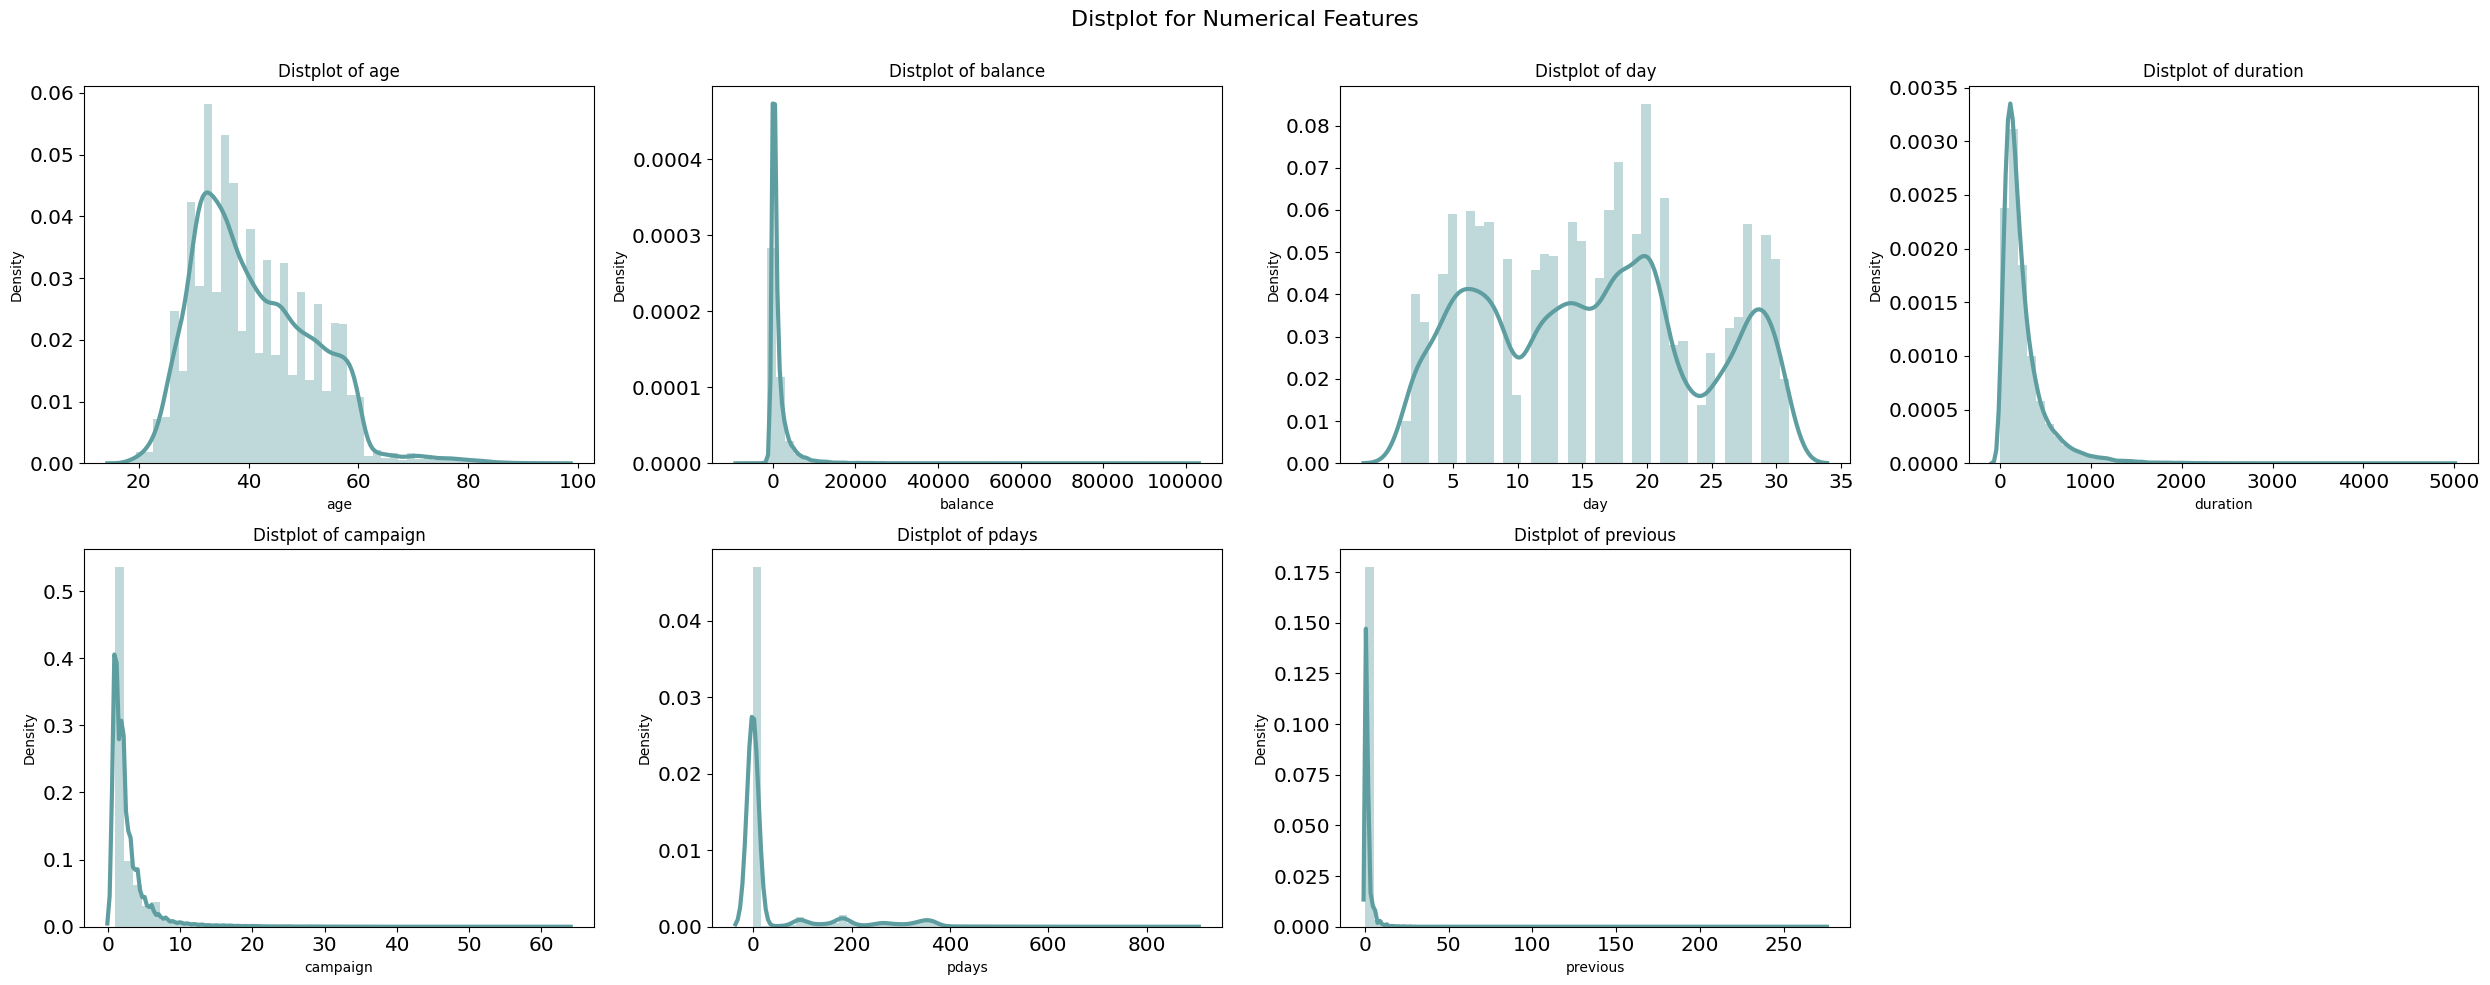

In [19]:
# Membuat distplot untuk seluruh numerical features
plt.figure(figsize=(25, 10))
for i in range(0, len(nums)):
    plt.subplot(2,4, i+1)
    sns.distplot(df_train[nums[i]], color='cadetblue')
    plt.title('Distplot of {}'.format(nums[i]))
    plt.suptitle('Distplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

In [20]:
#skewness value
for i in range(0, len(nums)):
    print(f"Skewness {df_train[nums].columns[i]} : {df_train[nums[i]].skew()}")

Skewness age : 0.6848179257252598
Skewness balance : 8.360308326166326
Skewness day : 0.09307901402122411
Skewness duration : 3.144318099423456
Skewness campaign : 4.898650166179674
Skewness pdays : 2.6157154736563477
Skewness previous : 41.84645447266292


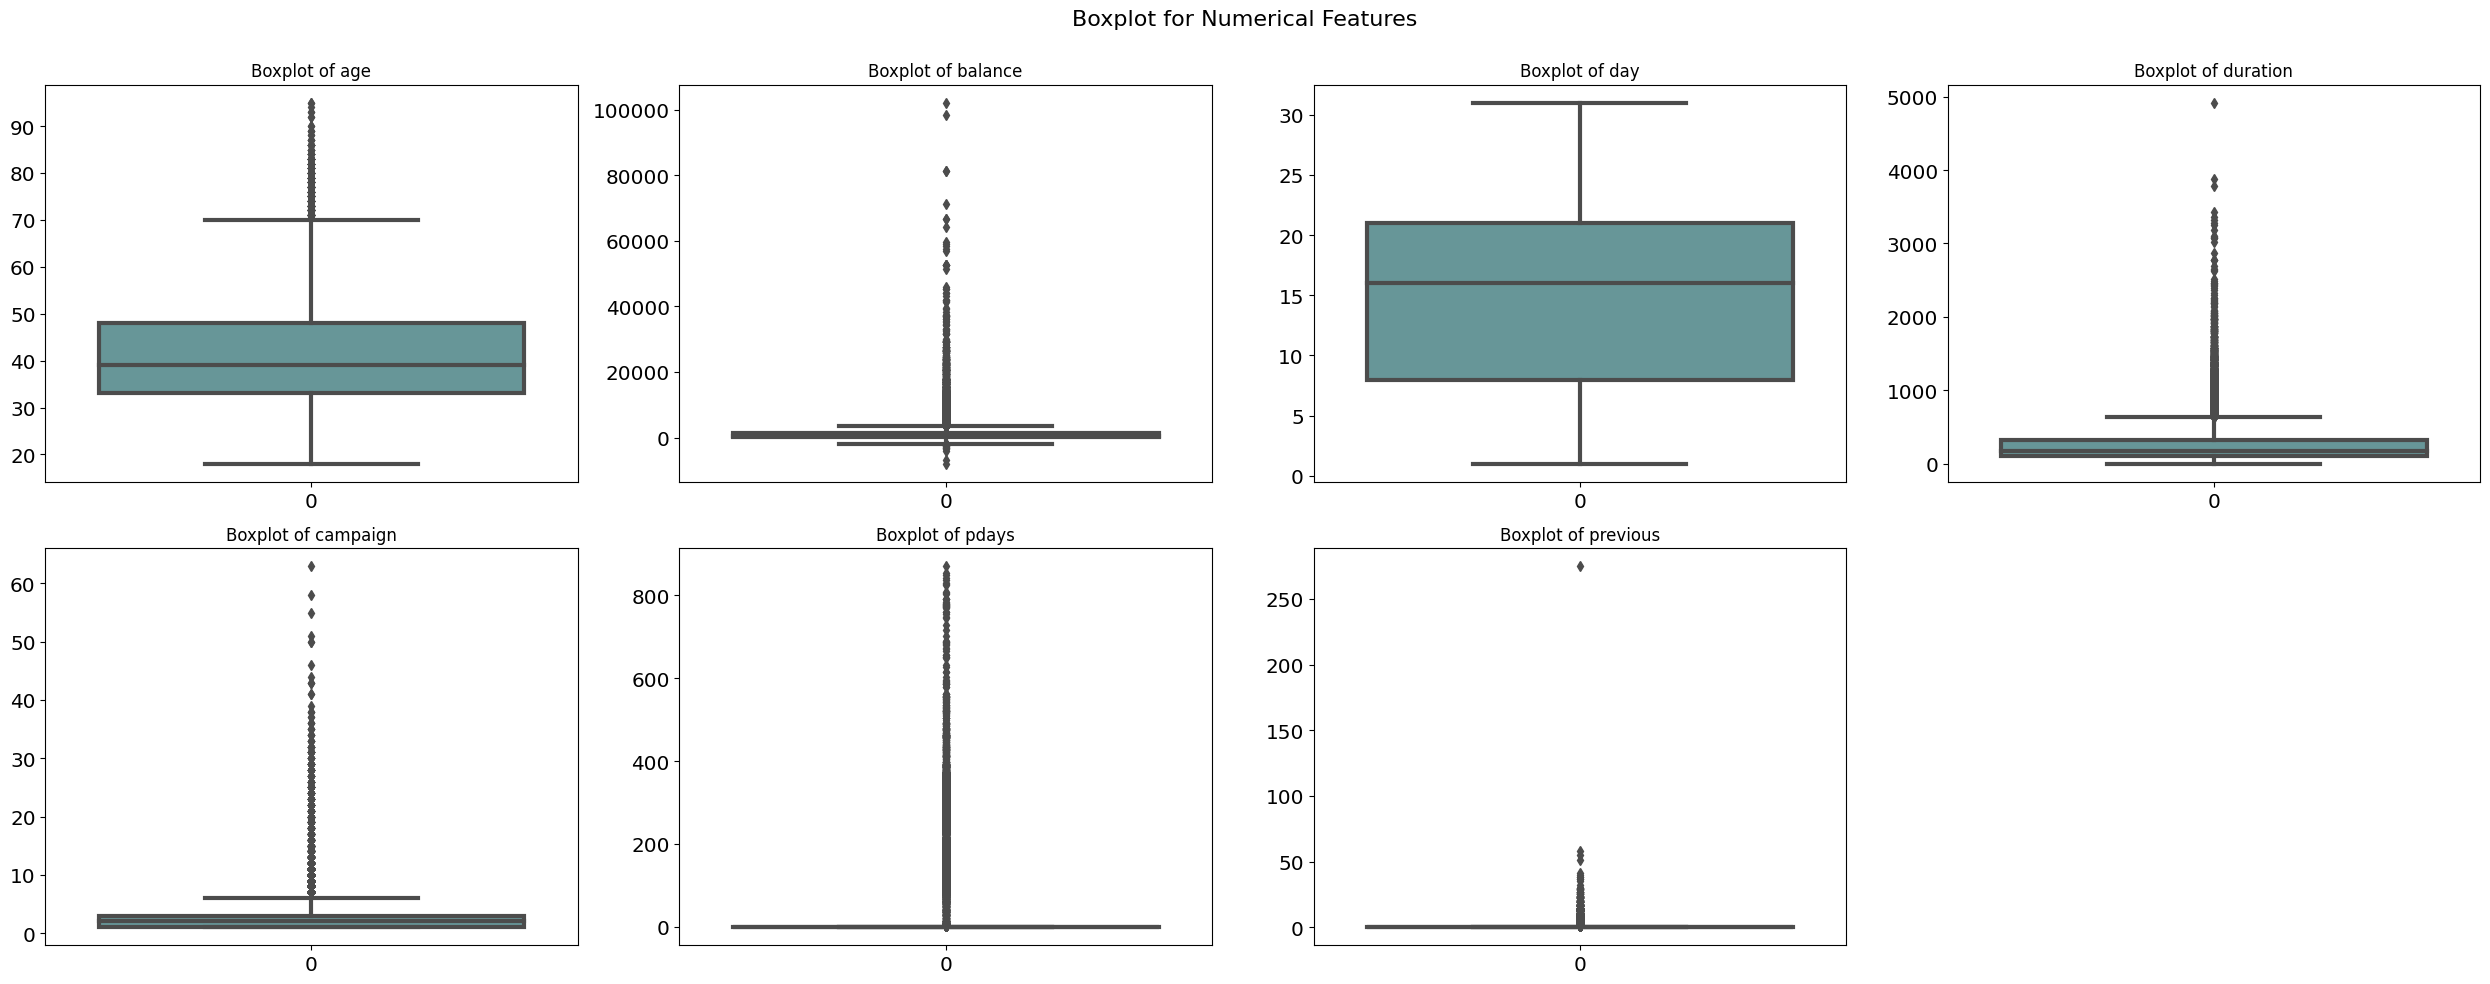

In [21]:
# Membuat boxplot untuk seluruh numerical features
plt.figure(figsize=(25, 10))
for i in range(0, len(nums)):
    plt.subplot(2,4, i+1)
    sns.boxplot(df_train[nums[i]], color='cadetblue')
    plt.title('Boxplot of {}'.format(nums[i]))
    plt.suptitle('Boxplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

Dari hasil visualisasi distribution plot dan boxplot diatas, dapat diketahui bahwa:
- Hampir seluruh kolom numerikal memiliki jenis distribusi `positively skewed` atau `right-skewed`, kecuali untuk distribusi untuk kolom `day` dimana kolom tersebut memiliki jenis distribusi `multimodal`.
- Terlihat bahwa kolom `balance`, `duration`, `campaign`, `pdays` dan `previous` memiliki persebaran data yang cukup luas.
- Terdapat banyak value yang berpotensi sebagai outliers pada seluruh kolom numerikal, kecuali kolom `day` yang terlihat tidak memiliki outliers.
- Terdapat beberapa value yang berpotensi menjadi outliers ekstrim pada kolom `balance`, `duration` dan `previous`.
- Pada kolom `balance`, `duration`, `campaign` didominasi oleh nilai yang kecil. Variasi data yang banyak pada nilai tinggi membuat oulier menjadi semakin banyak.
- Pada kolom `pdays` memiliki nilai -1 (belum dihubungi sebelumnya) yang mendominasi yaitu 36954 dari 45211 baris atau sekitar 81.7% data sehingga kotak menjadi berpusat pada nilai -1 sehingga nilai-nilai diatas -1 menjadi oulier yang cukup banyak sekitar 18.3%.
- Pada kolom previous memiliki nilai 0 yang mendominasi yang sesuai dengan nilai -1 pada kolom pdays karena nilai ini memiliki korelasi yang kuat. Sehingga selain dari nilai 0 akan menjadi outlier. Namun ada satu nilai yang benar-benar sangat jauh yaitu 275 (outlier ini dapat dihapus karena hanya satu saja dan jaraknya sangat jauh).

Terdapat hal yang perlu difollow-up pada tahap data pre-processing, yaitu melakukan standarisasi ataupun normalisasi dan juga melakukan handling outliers.

### Categorical Features

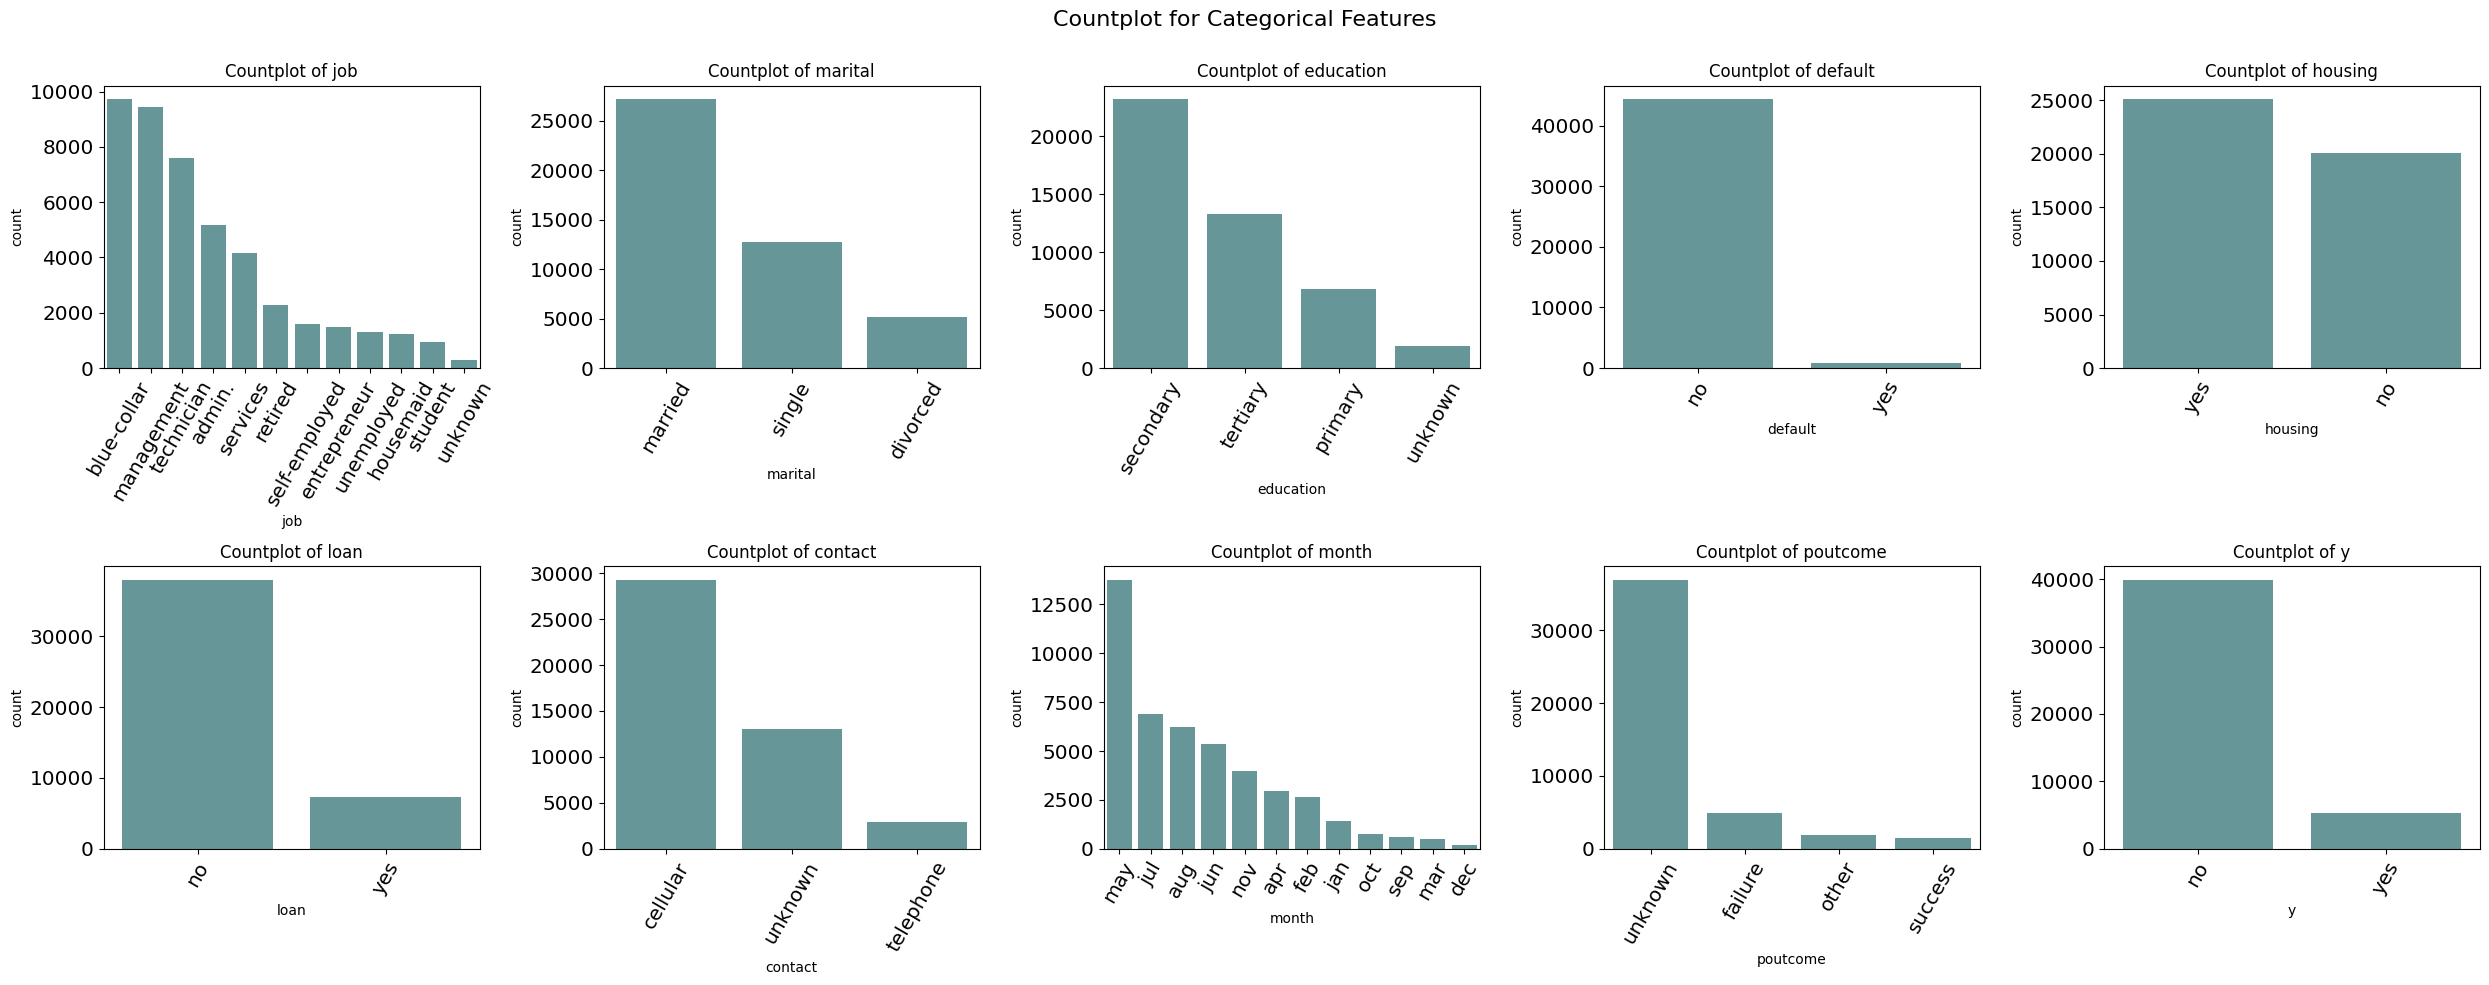

In [22]:
# Membuat catplot untuk setiap kolom kategori
plt.figure(figsize=(25, 10))
for i in range(0, len(cats)):
    plt.subplot(2,5, i+1)
    sns.countplot(x=df_train[cats[i]], color='cadetblue', order = df_train[cats[i]].value_counts().index)
    plt.title('Countplot of {}'.format(cats[i]))
    plt.suptitle('Countplot for Categorical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
    plt.xticks(rotation = 60)

plt.show()

Dari barplot diatas diperoleh bahwa dari keseluruhan data kategorik:
1. Nasabah yang terbanyak berprofesi sebagai management
2. Nasabah dengan status sudah menikah merupakan klien yang terbanyak
3. pendidikan secondary merupakan yang paling banyak
4. default no lebih banyak dibandingkan yes
5. Nasabah yang memiliki cicilan rumah lebih banyak daripada yang tidak memiliki rumah
6. Nasabah dengan status tidak ada pinjaman lebih banyak dibandingkan yang memiliki pinjaman
7. Nasabah lebih banyak dihubungi melalui cellular daripada telephone dan unknown
8. bulan may merupakan bulan yang paling banyak dilakukan campaign
9. hasil dari kampanye pemasaran sebelumnya yang paling banyak adalah unknown

Selain itu dapat diketahui juga bahwa:
- Terdapat beberapa kategori **unkown** pada kolom `job`, `education`, `contact` dan `poutcome`. Dimana jumlah kategori **unkown** pada kolom `poutcome` cukup mendominasi.
- Kategori `no` pada kolom `default` cukup mendominasi. Dimana sebanyak 98% value adalah `no` yang menandakan bahwa hampir seluruh nasabah yang dihubungi adalah nasabah yang tidak memiliki kredit.

Terdapat hal yang perlu difollow-up pada tahap data pre-processing, yaitu:
- Mengubah tipe data kategorikal menjadi tipe data numerikal agar dapat dilihat korelasinya dengan kolom-kolom numerikal lainnya menggunakan heatmap dan juga melihat tipe skewness masing-masing kolom.
- Membuang kolom `month` dan `day` karena rentang waktu yang ada pada dataset ini adalah Mei 2008 sampai November 2010, selain itu juga tidak terdapat informasi tahun sehingga akan membuat data menjadi bias karena beberapa bulan memiliki lebih banyak data daripada bulan yang lain seperti bulan ei memiliki 3 data (Mei 2008, Mei 2009, Mei 2010) tetapi April hanya memiliki 2 data (April 2009, April 2010).

## Multivariate Analysis

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti: <br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?<br>
**Korelasi antar feature dan label lemah. Namun, semua feature dapat dimanfaatkan untuk melakukan analisis kecuali feature `day`, `month` dan `pdays`.**

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?<br>
**Korelasi antar feature lemah. Selain itu, perlu dilakukan drop column `pdays` dikarenakan terindikasi redundant dengan kolom `previous`.**

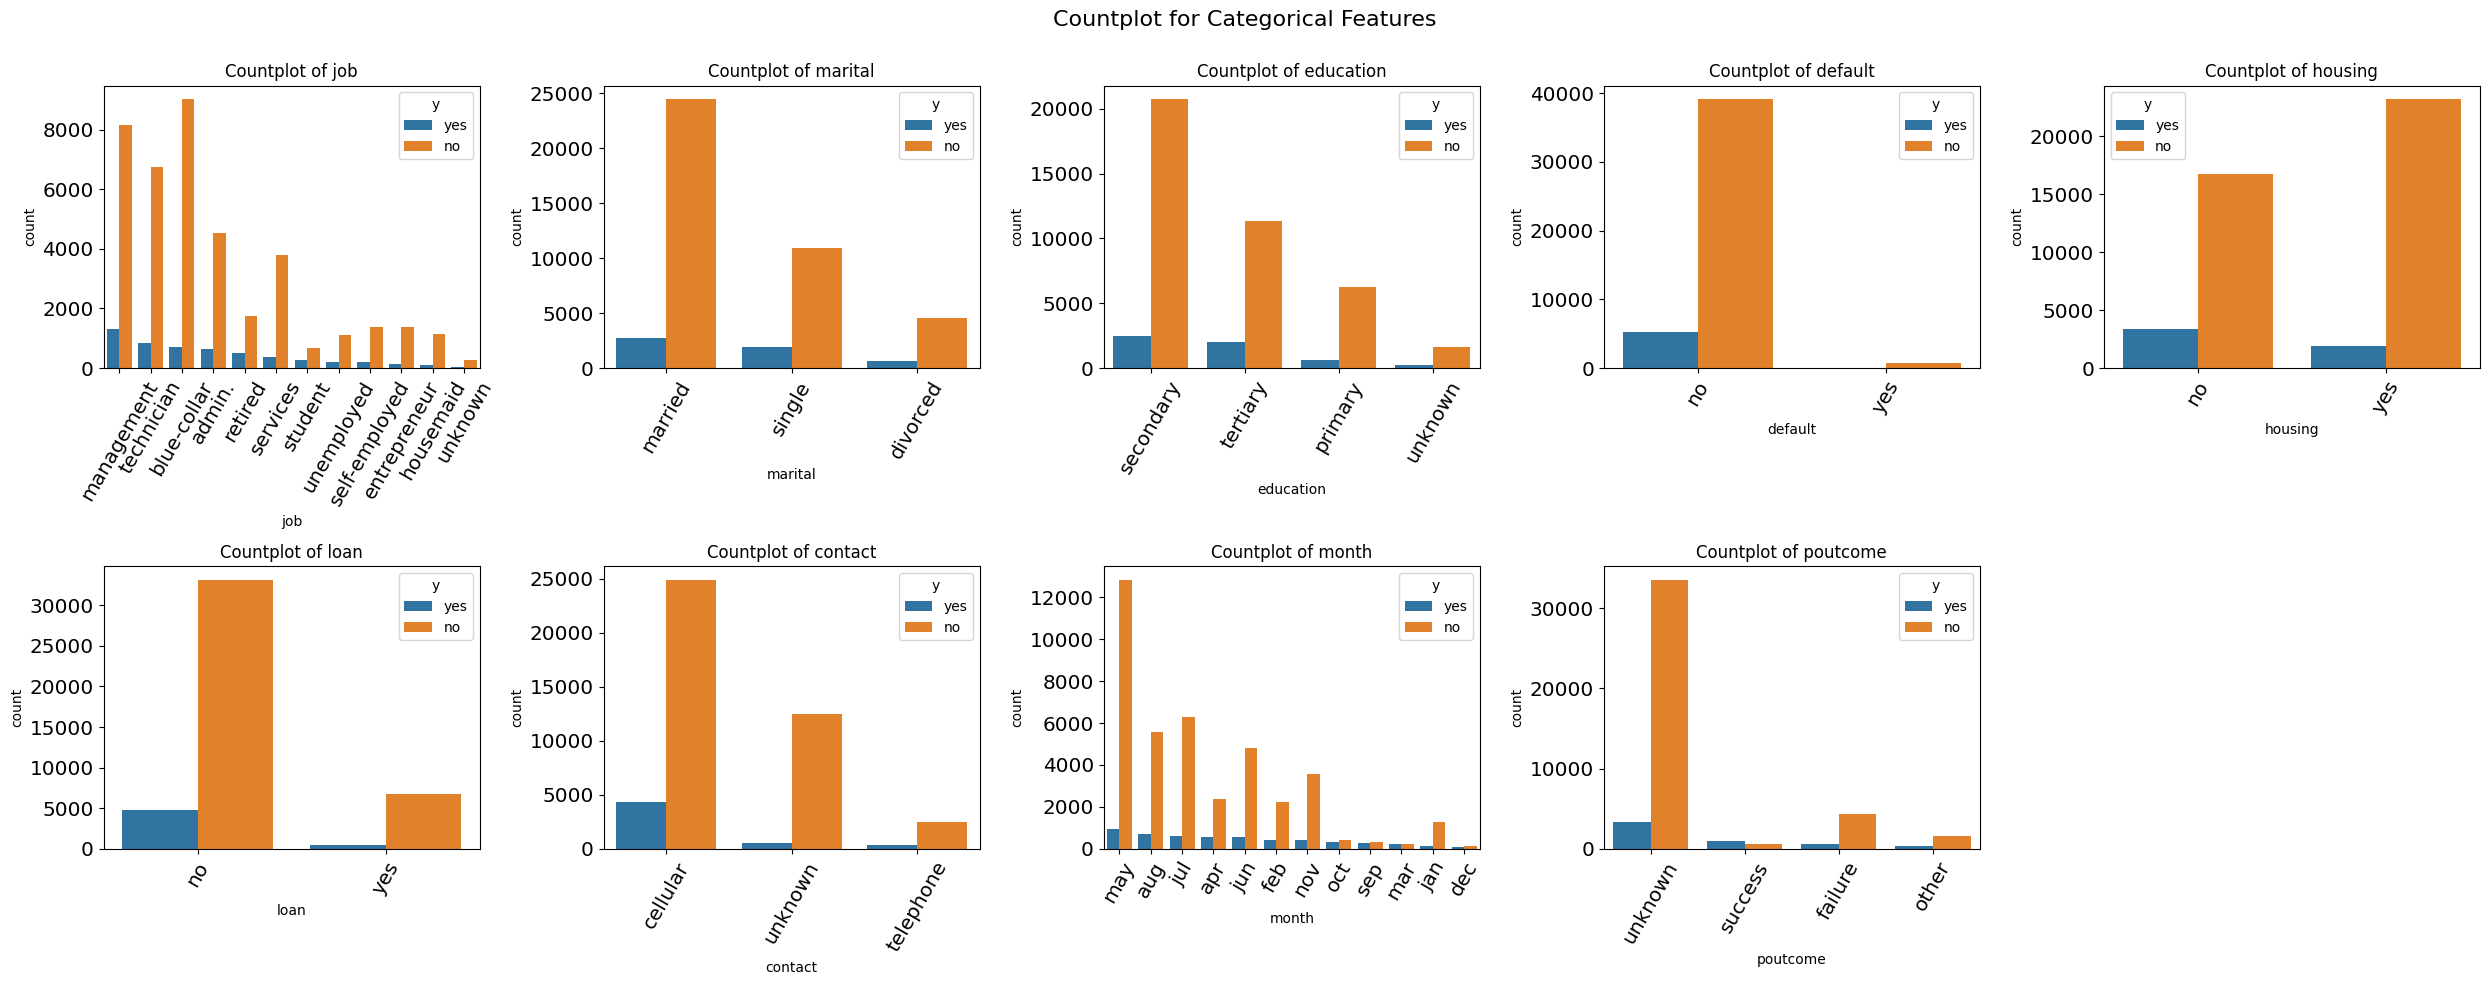

In [23]:
# Membuat catplot untuk setiap kolom kategori
plt.figure(figsize=(25, 10))
for i in range(0, len(cats)-1):
    df_group = df_train.groupby('y')[cats[i]].value_counts().reset_index(name='count').sort_values(by=['y','count'], ascending=False).set_index([cats[i]])
    plt.subplot(2,5, i+1)
    sns.countplot(x=df_train[cats[i]], order = df_group.index[:int(len(df_group)/2)], hue=df_train['y'], hue_order=['yes', 'no'])
    plt.title('Countplot of {}'.format(cats[i]))
    plt.suptitle('Countplot for Categorical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
    plt.xticks(rotation = 60)
    
plt.show()

Dari hasil visualisasi Countplot untuk seluruh variable kategorikal terhadap output variable yaitu `y`, dapat diketahui bahwa:

**Grafik Job**  
Nasabah dengan pekerjaan `blue-collar` adalah nasabah yang paling banyak dihubungi. Jenis pekerjaan `blue-collar` memiliki jumlah nasabah yang tidak berlangganan paling tinggi sedangkan pekerjaan `management` memiliki jumlah nasabah yang berlangganan paling tinggi. Untuk rasio tertinggi antara nasabah yang berlangganan dan tidak ada pada pekerjaan `student`, sedangkan rasio terendah adalah nasabah dengan pekerjaan `blue-collar`. Secara keseluruhan nasabah yang tidak berlangganan selalu lebih tinggi dibandingkan nasabah yang berlangganan.

**Grafik Marital**  
Status `married` memiliki jumlah nasabah yang berlangganan dan tidak berlangganan tertinggi disusul oleh status `single` dan `divorced`

**Grafik Education**  
Pendidikan `secondary` memiliki jumlah nasabah yang berlangganan dan tidak berlangganan tertinggi dan `primary` merupakan tingkat pendidikan dengan jumlah pel.

**Grafik Default**  
Nasabah yang belum memiliki kredit sebelumnya memiliki jumlah nasabah yang berlangganan dan tidak berlangganan tertinggi dibandingkan nasabah yang sudah memiliki kredit sebelumnya.

**Grafik Housing**  
Nasabah yang tidak memiliki cicilan rumah lebih banyak yang berlangganan dibandingkan nasabah yang memiliki cicilan rumah.

**Grafik Loan**  
Nasabah yang tidak memiliki pinjaman pribadi lebih banyak yang berlangganan dibandingkan nasabah yang memiliki pinjaman pribadi.

**Grafik Contact**  
Nasabah yang dihubungi menggunakan jenis komunikasi 'cellular' memiliki jumlah nasabah yang berlangganan paling banyak dibandingkan jenis komunikasi lain.

**Grafik Month**  
Bulan May memiliki nasabah yang berlangganan dan tidak paling tinggi dibandingkan bulan lainnya.

**Grafik Poutcome**  
Yang mengalami keberhasilan dari kampanye sebelumnya memiliki rasio pembukaan deposito tertinggi.


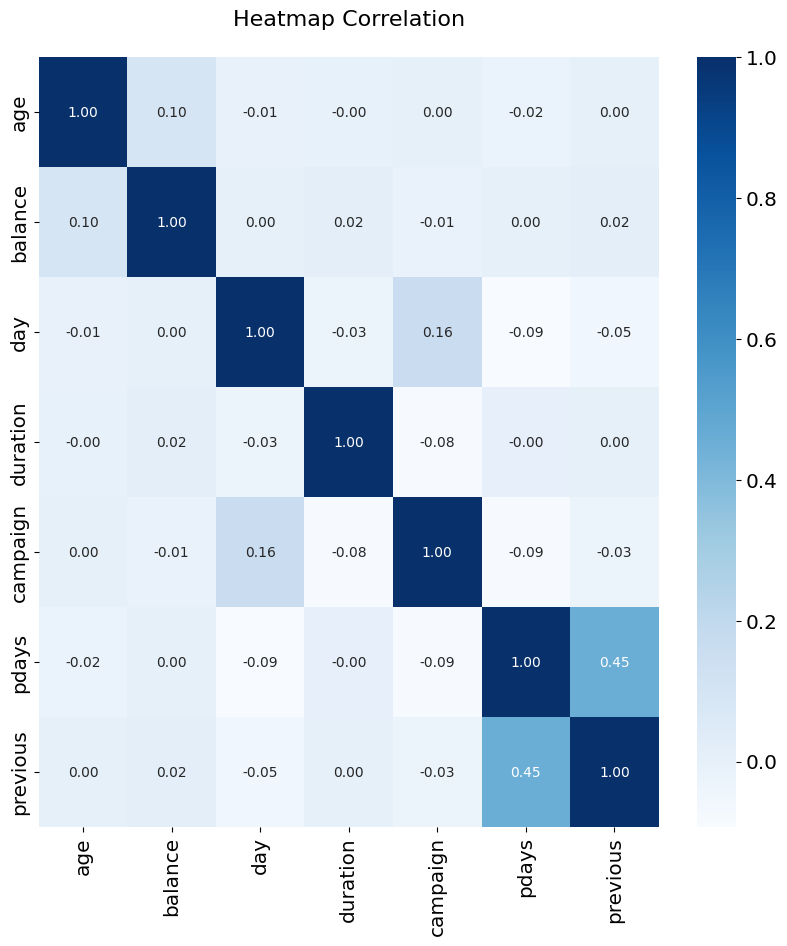

In [24]:
# Membuat heatmap untuk melihat korelasi antar kolom numerikal
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Heatmap Correlation\n', fontsize=16)
plt.show()

In [25]:
# plt.figure(figsize=(15, 15))
# sns.pairplot(df_train, diag_kind='kde', hue='y')
# plt.show()

Dari hasil visualisasi korelasi antar kolom numerikal dengan menggunakan heatmap dan pairplot diatas, dapat diketahui bahwa:
- Korelasi antar feature dan label lemah. Namun, semua feature dapat dimanfaatkan untuk melakukan analisis kecuali feature `month` dan `pdays`.
- Korelasi antar feature lemah.
- Feature `pdays` dan `previous` memiliki korelasi positif yang moderat. Dimana korelasi ini merupakan korelasi paling tinggi dibandingkan dengan pasangan lainnya. Berdasarkan dari deskripsi feature, kedua feature tersebut berisi keterangan tentang campaign sebelumnya, terdapat potensi bahwa kedua feature tersebut redundant. Maka dari itu kolom `pdays` akan di drop karena berpotensi redundant dengan kolom `previous`.
- Melakukan pengubahan tipe data kategorikal menjadi numerikal.

## Business Insights and Visualizations

In [26]:
def test(x):
    df_pro1 = df_train.groupby([x, 'y']).agg({'pdays':'count'}).reset_index().rename(columns={'pdays':'unique_customer'})
    df_pro2 = df_train.groupby([x]).agg({'pdays':'count'}).reset_index().rename(columns={'pdays':'total_customer'})

    df_pro = df_pro1.merge(df_pro2, how = 'inner', on=x)
    df_pro['percentage'] = round(df_pro['unique_customer'] / df_pro['total_customer'] * 100, 2)
    
    
    df_pro_pivot = df_pro.pivot_table(values=['unique_customer', 'percentage'], columns='y', index=x).reset_index()
    df_pro_pivot.columns = [x, 'no_perc', 'yes_perc', 'no_count', 'yes_count']
    df_pro_pivot = df_pro_pivot.fillna(0)
    df_pro_pivot['total_count'] = df_pro_pivot['no_count'] + df_pro_pivot['yes_count']
    return df_pro_pivot[[x, 'yes_count', 'no_count', 'yes_perc', 'no_perc', 'total_count']]

In [27]:
age_ratio = test('age')
age_ratio.total_count.sum()

45211.0

In [28]:
(age_ratio['yes_count'] + age_ratio['no_count']).sum()

45211.0

In [29]:
age_ratio

,age,yes_count,no_count,yes_perc,no_perc,total_count
0,18,7.0,5.0,58.33,41.67,12.0
1,19,11.0,24.0,31.43,68.57,35.0
2,20,15.0,35.0,30.00,70.00,50.0
3,21,22.0,57.0,27.85,72.15,79.0
4,22,40.0,89.0,31.01,68.99,129.0
...,...,...,...,...,...,...
72,90,2.0,0.0,100.00,0.00,2.0
73,92,2.0,0.0,100.00,0.00,2.0
74,93,2.0,0.0,100.00,0.00,2.0
75,94,0.0,1.0,0.00,100.00,1.0


In [30]:
def rasio(cat, yaxis_height=100, bar_color='cadetblue'):
    #Membuat visualisasi bar chart dan pie chart.
    style.use('seaborn')
    ##Mengurutkan data frame `df3_group_pivot` berdasarkan nilai churn secara descending.
    df_pro_pivot = test(cat)
    df_pro_pivot2 = df_pro_pivot.sort_values('yes_perc', ascending=False)

    ##Inisiasi variabel pendukung
    labels = list(df_pro_pivot2[cat])
    yes = df_pro_pivot2['yes_perc'].tolist()
    no = df_pro_pivot2['no_perc'].tolist()
    x = np.arange(len(labels)) # lokasi label
    width = 0.7 # lebar bar

    fig, ax1 = plt.subplots() #Inisiasi subplot 1 row 2 columns

    ##Membuat visualisasi barplot
    rects1 = ax1.bar(x, yes, width, label='Yes', color=bar_color)

    ## Inisiasi figure size
    fig.set_figheight(8)
    fig.set_figwidth(15)

    ## Menambahkan labels, title dan custom x-axis tick labels, dan sebagainya.
    ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
    ax1.set_facecolor('white')
    ax1.set_ylabel('Ratio (%)',fontsize=13)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, fontsize=13)
    ax1.bar_label(rects1, padding=10, fontsize=13, bbox = dict(facecolor = 'lightgray', alpha = .5))
    ax1.set_ylim([0, yaxis_height])
    plt.yticks(fontsize=13)

In [31]:
def ratio_count(cat, percent_height=100, bar_color='cadetblue', fig_row=1, fig_col=1, h_space=0.5):
    #Membuat visualisasi
    style.use('seaborn')

    fig, (ax1, ax2) = plt.subplots(fig_row, fig_col) #Inisiasi subplot 1 row 2 columns
    ## Inisiasi figure size
    fig.set_figheight(15)
    fig.set_figwidth(20)

    ##Mengurutkan data frame `df3_group_pivot` berdasarkan nilai churn secara descending.
    df_pro_pivot = test(cat)
    df_pro_pivot2 = df_pro_pivot.sort_values('yes_perc', ascending=False)

    ##Inisiasi variabel pendukung
    labels = list(df_pro_pivot2[cat])
    yes = df_pro_pivot2['yes_perc'].tolist()
    no = df_pro_pivot2['no_perc'].tolist()
    x = np.arange(len(labels)) # lokasi label
    width = 0.7 # lebar bar

    ##Membuat visualisasi barplot
    rects1 = ax1.bar(x, yes, width, label='Yes', color=bar_color)

    ## Menambahkan labels, title dan custom x-axis tick labels, dan sebagainya.
    ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
    ax1.set_facecolor('whitesmoke')
    ax1.set_ylabel('Ratio (%)',fontsize=13)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, fontsize=13)
    ax1.bar_label(rects1, padding=10, fontsize=13, bbox = dict(facecolor = 'lightgray', alpha = .5))
    ax1.set_ylim([0, percent_height])
    ax1.set_xlabel(cat)
    # ax1.set_title('Rasio Pembukaan Akun Deposito berdasarkan Jenis Pekerjaan Nasabah')

    #Visualisasi Countplot
    df_pro_pivot3 = test(cat)
    df_pro_pivot4 = df_pro_pivot.sort_values('total_count', ascending=False)

    ##Inisiasi variabel pendukung
    labels2 = list(df_pro_pivot2[cat])
    yes2 = df_pro_pivot2['yes_count'].tolist()
    no2 = df_pro_pivot2['no_count'].tolist()
    x2 = np.arange(len(labels)) # lokasi label
    width2 = 0.4 # lebar bar

    ##Membuat visualisasi barplot
    rects3 = ax2.bar(x - width2/2, yes2, width2, label='Yes', color='cadetblue')
    rects4 = ax2.bar(x + width2/2, no2, width2, label='No', color='darkseagreen')

    ax2.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
    ax2.set_facecolor('whitesmoke')
    ax2.set_ylabel('Count',fontsize=13)
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels, fontsize=13)
    ax2.bar_label(rects3, padding=10, fontsize=10, bbox = dict(facecolor = 'lightgray', alpha = .5))
    ax2.bar_label(rects4, padding=10, fontsize=10, bbox = dict(facecolor = 'lightgray', alpha = .5))
    ax2.set_ylim([0, df_train[cat].value_counts().max()*1.01])
    plt.legend()
    plt.yticks(fontsize=10)
    
    plt.subplots_adjust(hspace=h_space)
    plt.xlabel(cat)
    return fig, (ax1, ax2)

### Customer Decision after Telemarketing Analysis

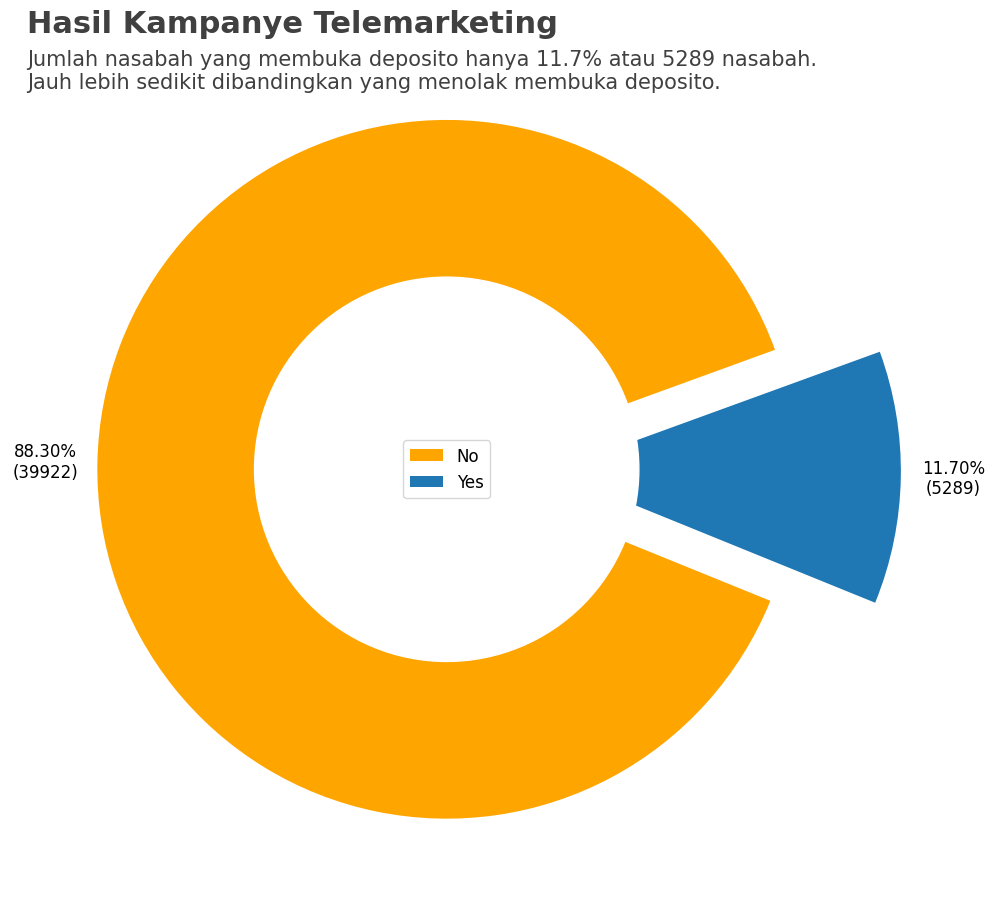

In [32]:
df_group_target = df_train.groupby('y').agg({'age':'count'}).reset_index().rename(columns={'age':'count'})
df_group_target['percentage'] = df_group_target['count']/len(df_train)*100
target = df_group_target['count']

# Creating autocpt arguments
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

# Creating plot
plt.figure(figsize=(10,10), facecolor='white')
plt.rcParams['font.size'] = 12
plt.pie(target,
        autopct = make_autopct(target),
        explode=[0, 0.3],
        colors=['orange', 'tab:blue'], 
        pctdistance=1.15,
        startangle=20)
circle = plt.Circle( (0,0), 0.55, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
# plt.title('Deposit Taken Pie Chart')
plt.legend(labels=['No','Yes'], loc='center', fontsize=12)
plt.text(x = -1.2, y = 1.25, s = "Hasil Kampanye Telemarketing",
               fontsize = 22, weight = 'bold', alpha = .75)
plt.text(x = -1.2, y = 1.09, s = "Jumlah nasabah yang membuka deposito hanya 11.7% atau 5289 nasabah. \nJauh lebih sedikit dibandingkan yang menolak membuka deposito.",
               fontsize = 15, alpha = .75)

plt.tight_layout()
plt.show()

### Job Type Analysis on Term Deposit Account Subscriptions

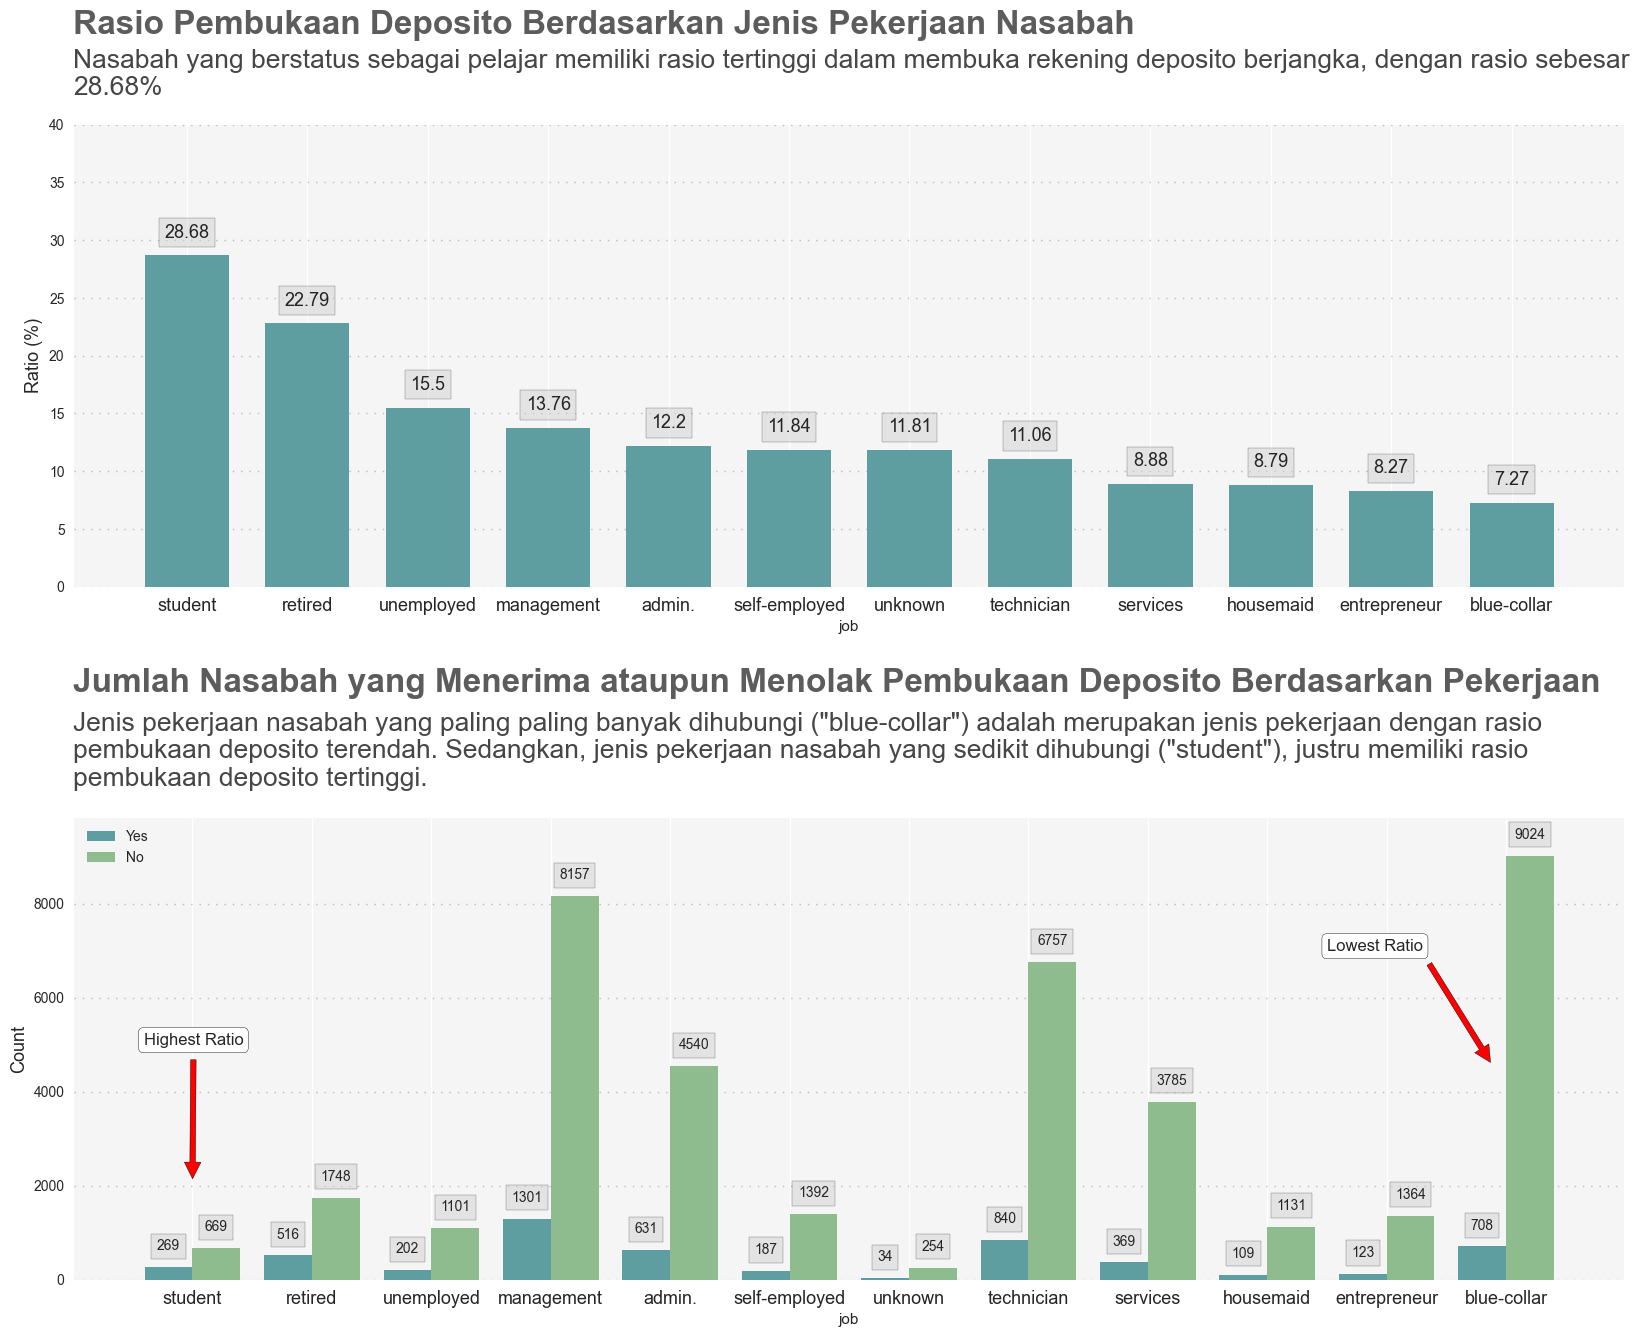

In [33]:
ratio_count('job', percent_height=40, fig_row=2, fig_col=1)
plt.text(x = -1, y = 26500, s = "Rasio Pembukaan Deposito Berdasarkan Jenis Pekerjaan Nasabah",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -1, y = 25200,
               s = 'Nasabah yang berstatus sebagai pelajar memiliki rasio tertinggi dalam membuka rekening deposito berjangka, dengan rasio sebesar \n28.68%',
              fontsize = 19, alpha = .85)
plt.text(x = -1, y = 12500, s = "Jumlah Nasabah yang Menerima ataupun Menolak Pembukaan Deposito Berdasarkan Pekerjaan",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -1, y = 10500,
               s = 'Jenis pekerjaan nasabah yang paling paling banyak dihubungi ("blue-collar") adalah merupakan jenis pekerjaan dengan rasio \npembukaan deposito terendah. Sedangkan, jenis pekerjaan nasabah yang sedikit dihubungi ("student"), justru memiliki rasio \npembukaan deposito tertinggi.',
              fontsize = 19, alpha = .85)

plt.annotate('Highest Ratio', xy =(0, 2000),
                xytext =(-0.41, 5000), 
                arrowprops = dict(facecolor ='red', shrink=0.05),
                fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

plt.annotate('Lowest Ratio', xy =(10.9
                                  , 4500),
                xytext =(9.5, 7000), 
                arrowprops = dict(facecolor ='red', shrink=0.05),
                fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

plt.show()

### Marital Status Analysis on Term Deposit Account Subscriptions

In [34]:
df_train.groupby('marital')['y'].count()

marital
divorced     5207
married     27214
single      12790
Name: y, dtype: int64

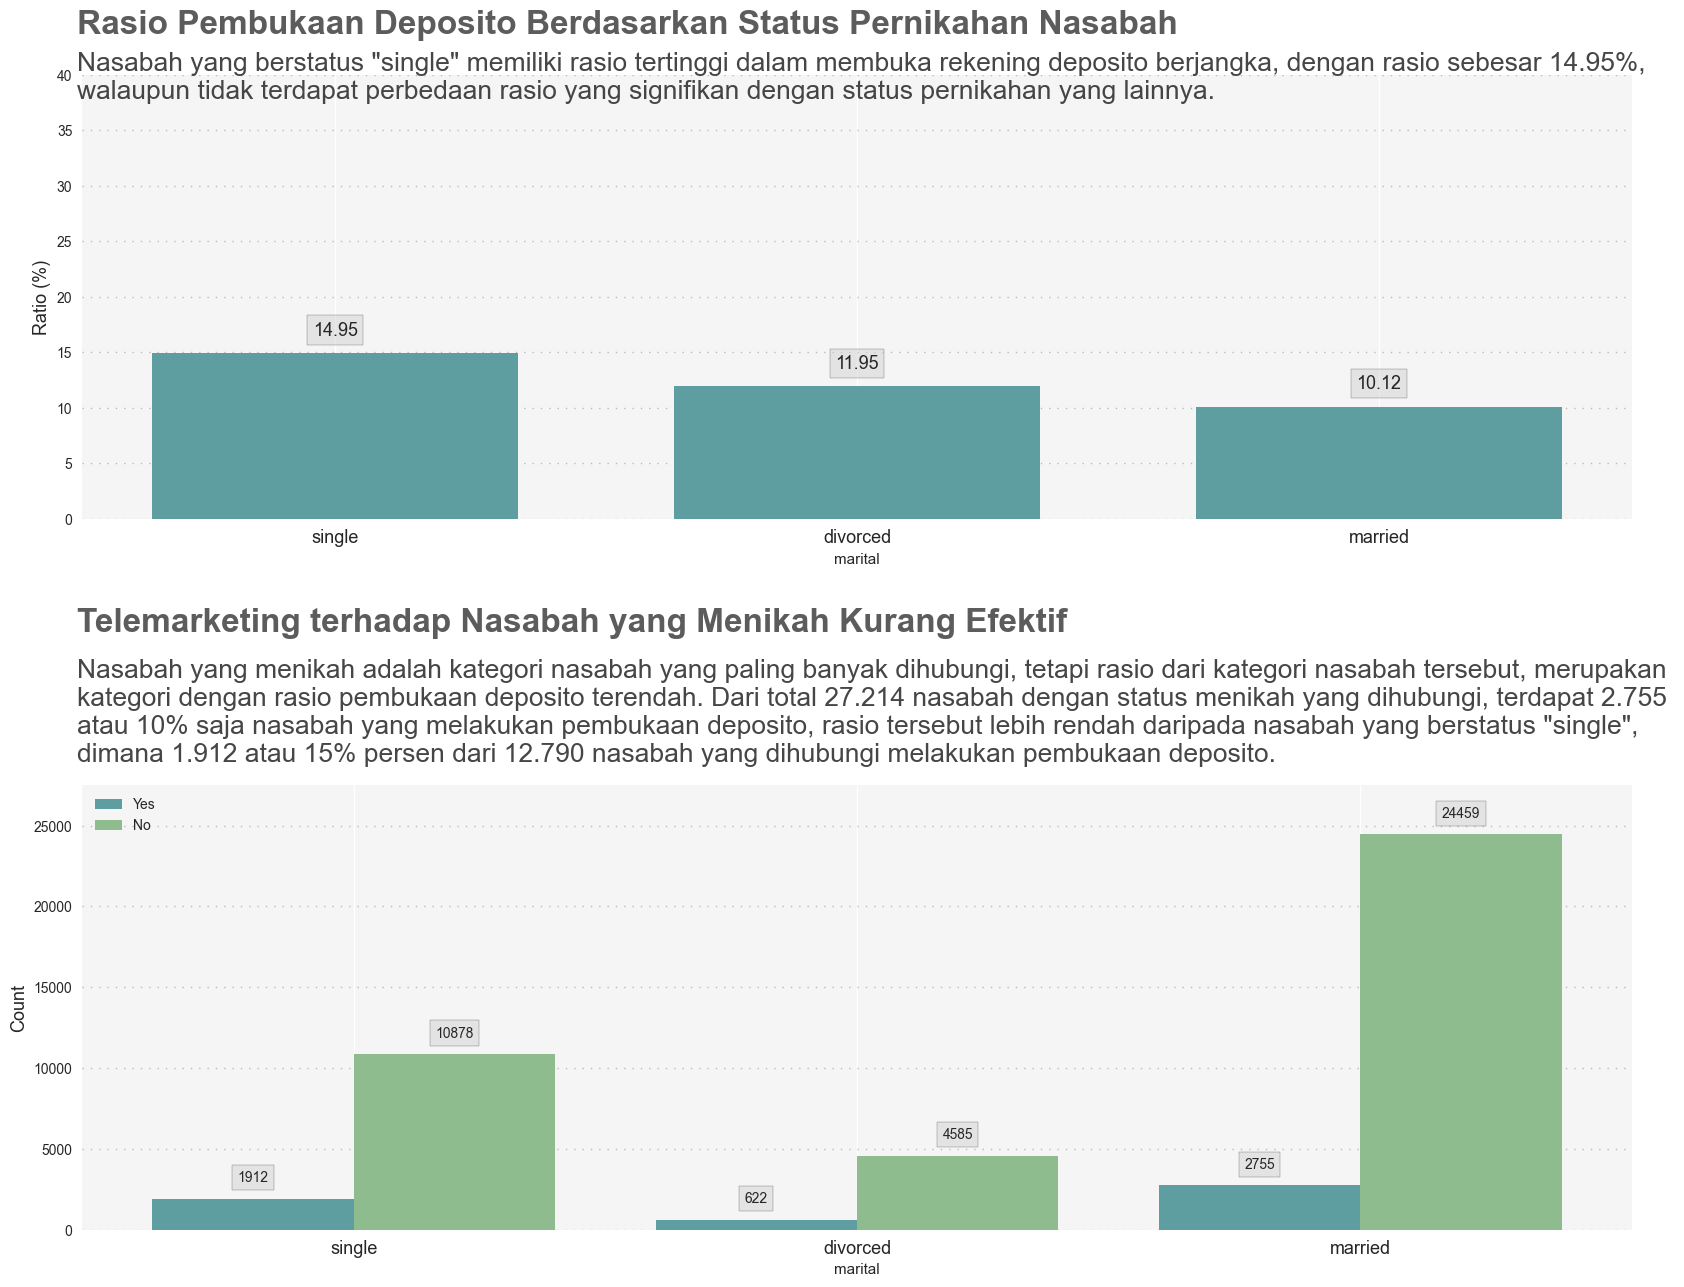

In [35]:
ratio_count('marital', percent_height=40, fig_row=2, fig_col=1, h_space=0.6)
plt.text(x = -0.55, y = 74000, s = "Rasio Pembukaan Deposito Berdasarkan Status Pernikahan Nasabah",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.55, y = 70000,
               s = 'Nasabah yang berstatus "single" memiliki rasio tertinggi dalam membuka rekening deposito berjangka, dengan rasio sebesar 14.95%, \nwalaupun tidak terdapat perbedaan rasio yang signifikan dengan status pernikahan yang lainnya.',
              fontsize = 19, alpha = .85)
plt.text(x = -0.55, y = 37000, s = "Telemarketing terhadap Nasabah yang Menikah Kurang Efektif",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.55, y = 29000,
               s = 'Nasabah yang menikah adalah kategori nasabah yang paling banyak dihubungi, tetapi rasio dari kategori nasabah tersebut, merupakan \nkategori dengan rasio pembukaan deposito terendah. Dari total 27.214 nasabah dengan status menikah yang dihubungi, terdapat 2.755 \natau 10% saja nasabah yang melakukan pembukaan deposito, rasio tersebut lebih rendah daripada nasabah yang berstatus "single", \ndimana 1.912 atau 15% persen dari 12.790 nasabah yang dihubungi melakukan pembukaan deposito.',
              fontsize = 19, alpha = .85)

# plt.annotate('Highest Ratio', xy =(0, 2000),
#                 xytext =(-0.41, 5000), 
#                 arrowprops = dict(facecolor ='red', shrink=0.05),
#                 fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

# plt.annotate('Lowest Ratio', xy =(10.9
#                                   , 4500),
#                 xytext =(9.5, 7000), 
#                 arrowprops = dict(facecolor ='red', shrink=0.05),
#                 fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

plt.show()

### Education Background Analysis on Term Deposit Account Subscriptions

Text(0.35, 27, 'Highest Ratio')

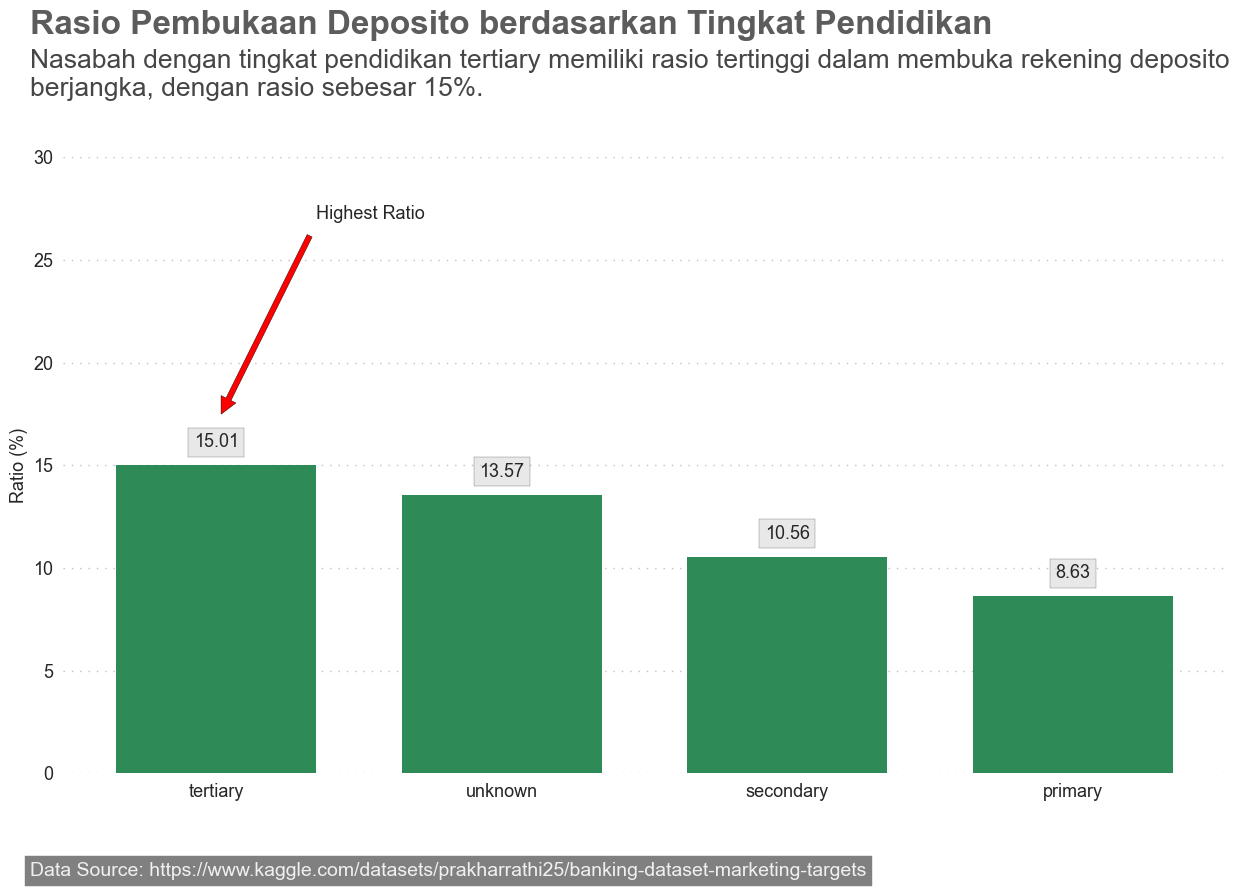

In [36]:
rasio('education', 30, 'seagreen')

## Menambahkan judul dan unsur grafis lainnya
plt.text(x = -0.65, y = 36, s = "Rasio Pembukaan Deposito berdasarkan Tingkat Pendidikan",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.65, y = 33,
               s = 'Nasabah dengan tingkat pendidikan tertiary memiliki rasio tertinggi dalam membuka rekening deposito \nberjangka, dengan rasio sebesar 15%. ',
              fontsize = 19, alpha = .85)
plt.text(x = -0.65, y = -5,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
plt.annotate('Highest Ratio', xy =(0, 17),
                xytext =(0.35, 27), 
                arrowprops = dict(facecolor ='red',
                                  shrink = 0.05),
                fontsize=13)

### Duration Analysis on Term Deposit Account Subscriptions

In [37]:
df_yes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0
balance,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0
day,5289.0,15.158253,8.501875,1.0,8.0,15.0,22.0,31.0
duration,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0
campaign,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0
pdays,5289.0,68.702968,118.822266,-1.0,-1.0,-1.0,98.0,854.0
previous,5289.0,1.170354,2.553272,0.0,0.0,0.0,1.0,58.0


In [38]:
len(df_yes[(df_yes['duration'] >= 120) & (df_yes['duration'] <= 540)])/len(df_yes)

0.5674040461334846

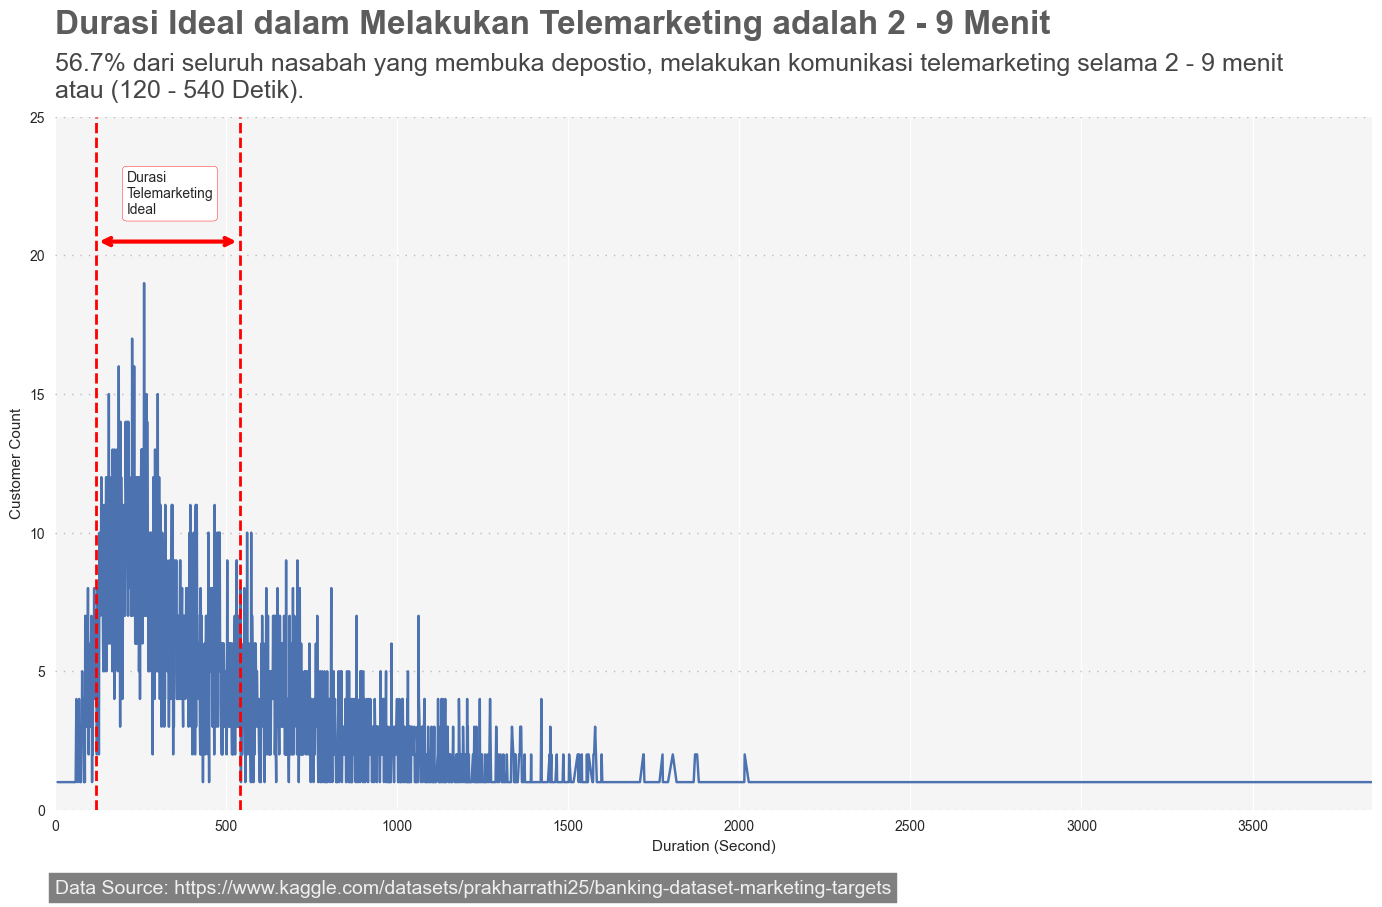

In [39]:
df_plot = df_yes.groupby('duration').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='duration', y='y')
plt.ylabel('Customer Count')
plt.xlabel('Duration (Second)')
plt.axvline(x=120, linewidth=2, color='red', linestyle='--')
plt.axvline(x=540, linewidth=2, color='red', linestyle='--')
plt.xlim(0, 3850)
plt.ylim(0, 25)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
ax1.set_facecolor('whitesmoke')
    
plt.text(x = -0.65, y = 28, s = "Durasi Ideal dalam Melakukan Telemarketing adalah 2 - 9 Menit",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.65, y = 25.7,
               s = '56.7% dari seluruh nasabah yang membuka depostio, melakukan komunikasi telemarketing selama 2 - 9 menit \natau (120 - 540 Detik).',
              fontsize = 18, alpha = .85)
plt.text(x = -0.65, y = -3,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.annotate('', xy =(122, 20.5),
                xytext =(539, 20.5), 
                arrowprops = dict(arrowstyle="<->", connectionstyle="arc3", color='r', lw=3),
                fontsize=13)

plt.text(x = 210, y = 21.5,
    s = 'Durasi\nTelemarketing\nIdeal',fontsize = 10, bbox = dict(boxstyle ="round", fc ="1", color='r'))
plt.savefig('bizinsight1.png')
plt.show()


In [40]:
df_pro1 = df_train.groupby(['duration', 'y']).agg({'age':'count'}).reset_index().rename(columns={'age':'unique_customer'})
df_pro2 = df_train.groupby(['duration']).agg({'age':'count'}).reset_index().rename(columns={'age':'total_customer'})

df_pro = df_pro1.merge(df_pro2, how = 'inner', on='duration')
df_pro['percentage'] = round(df_pro['unique_customer'] / df_pro['total_customer'] * 100, 2)

In [41]:
df_ratio_dura = test('duration')
df_ratio_dura

,duration,yes_count,no_count,yes_perc,no_perc,total_count
0,0,0.0,3.0,0.0,100.0,3.0
1,1,0.0,2.0,0.0,100.0,2.0
2,2,0.0,3.0,0.0,100.0,3.0
3,3,0.0,4.0,0.0,100.0,4.0
4,4,0.0,15.0,0.0,100.0,15.0
...,...,...,...,...,...,...
1568,3366,0.0,1.0,0.0,100.0,1.0
1569,3422,0.0,1.0,0.0,100.0,1.0
1570,3785,0.0,1.0,0.0,100.0,1.0
1571,3881,1.0,0.0,100.0,0.0,1.0


### Number of Contact During this Campaign Analysis on Term Deposit Account Subscriptions

In [42]:
len(df_yes[(df_yes['campaign'] >= 1) & (df_yes['campaign'] <= 3)])/len(df_yes)

0.8659481943656646

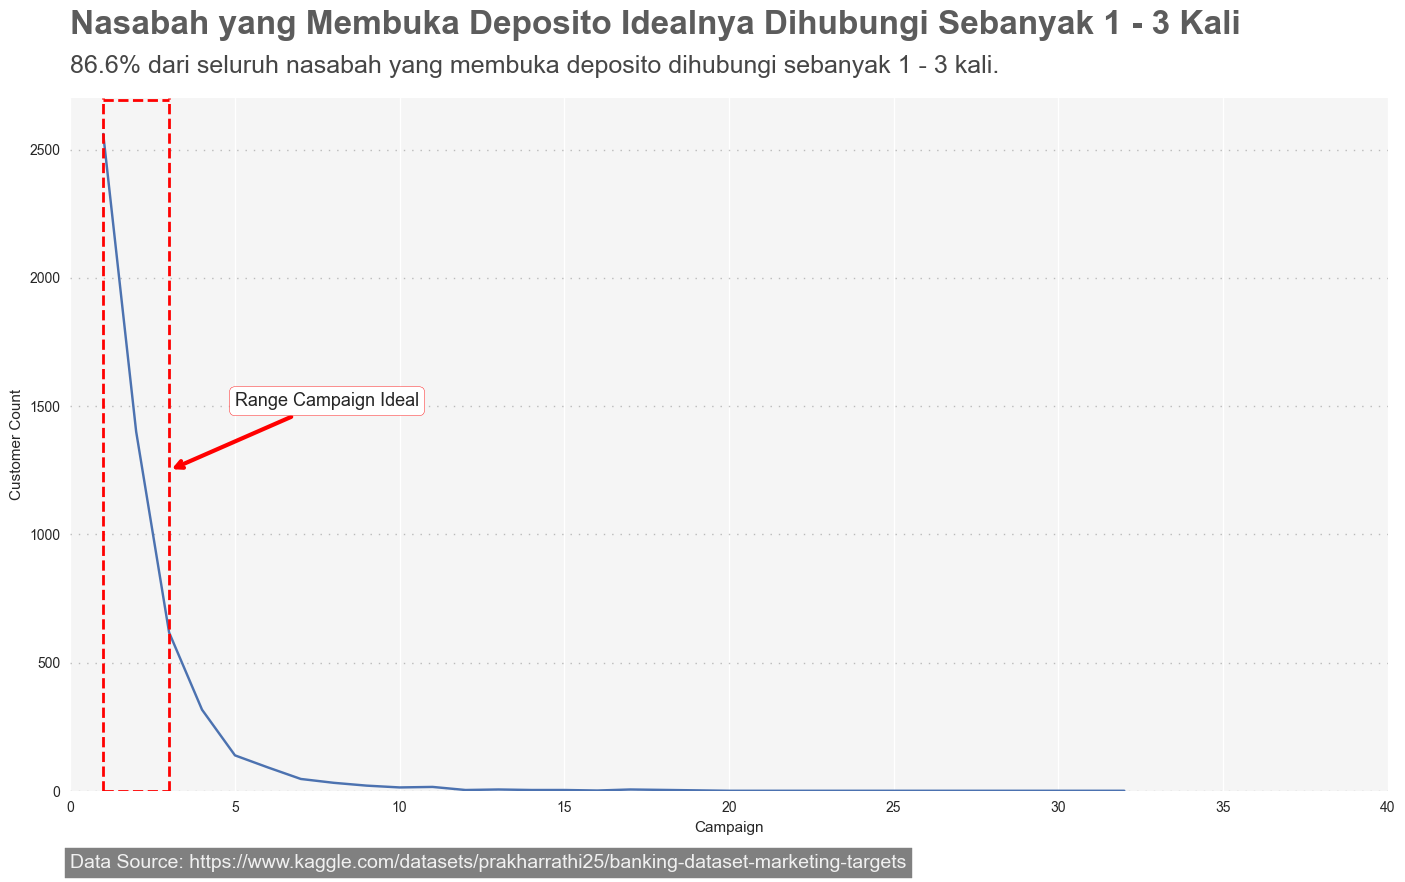

In [43]:
from matplotlib.patches import Rectangle

df_plot = df_yes.groupby('campaign').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='campaign', y='y')
plt.ylabel('Customer Count')
plt.xlabel('Campaign')
plt.axvline(x=1, linewidth=2, color='red', linestyle='--')
plt.axvline(x=3, linewidth=2, color='red', linestyle='--')
ax1.hlines(xmin=1, xmax=3, y=2695, linewidth=2, color='red', linestyle='--')
ax1.hlines(xmin=1, xmax=3, y=0, linewidth=2, color='red', linestyle='--')
plt.xlim(0, 40)
plt.ylim(-1, 2700)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
ax1.set_facecolor('whitesmoke')
    
plt.text(x = 0, y = 2950, s = "Nasabah yang Membuka Deposito Idealnya Dihubungi Sebanyak 1 - 3 Kali",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = 0, y = 2800,
               s = '86.6% dari seluruh nasabah yang membuka deposito dihubungi sebanyak 1 - 3 kali.',
              fontsize = 18, alpha = .85)
plt.text(x = 0, y = -300,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.annotate('Range Campaign Ideal', xy =(3, 1250),
                xytext =(5, 1500), 
                arrowprops = dict(arrowstyle="->", connectionstyle="arc3", color='r', lw=3),
                fontsize=13, bbox = dict(boxstyle ="round", fc ="1", color='r'))


# plt.text(x = -0.65, y = 21.5,
#     s = 'Ideal\nTelemarketing\nDuration',fontsize = 10, bbox = dict(boxstyle ="round", fc ="1", color='r'))
# plt.savefig('bizinsight2.png')
plt.show()

### Customer Age Analysis on Term Deposit Account Subscriptions

In [44]:
len(df_yes[(df_yes['age'] >= 25) & (df_yes['age'] <= 40)])/len(df_yes)

0.5199470599357157

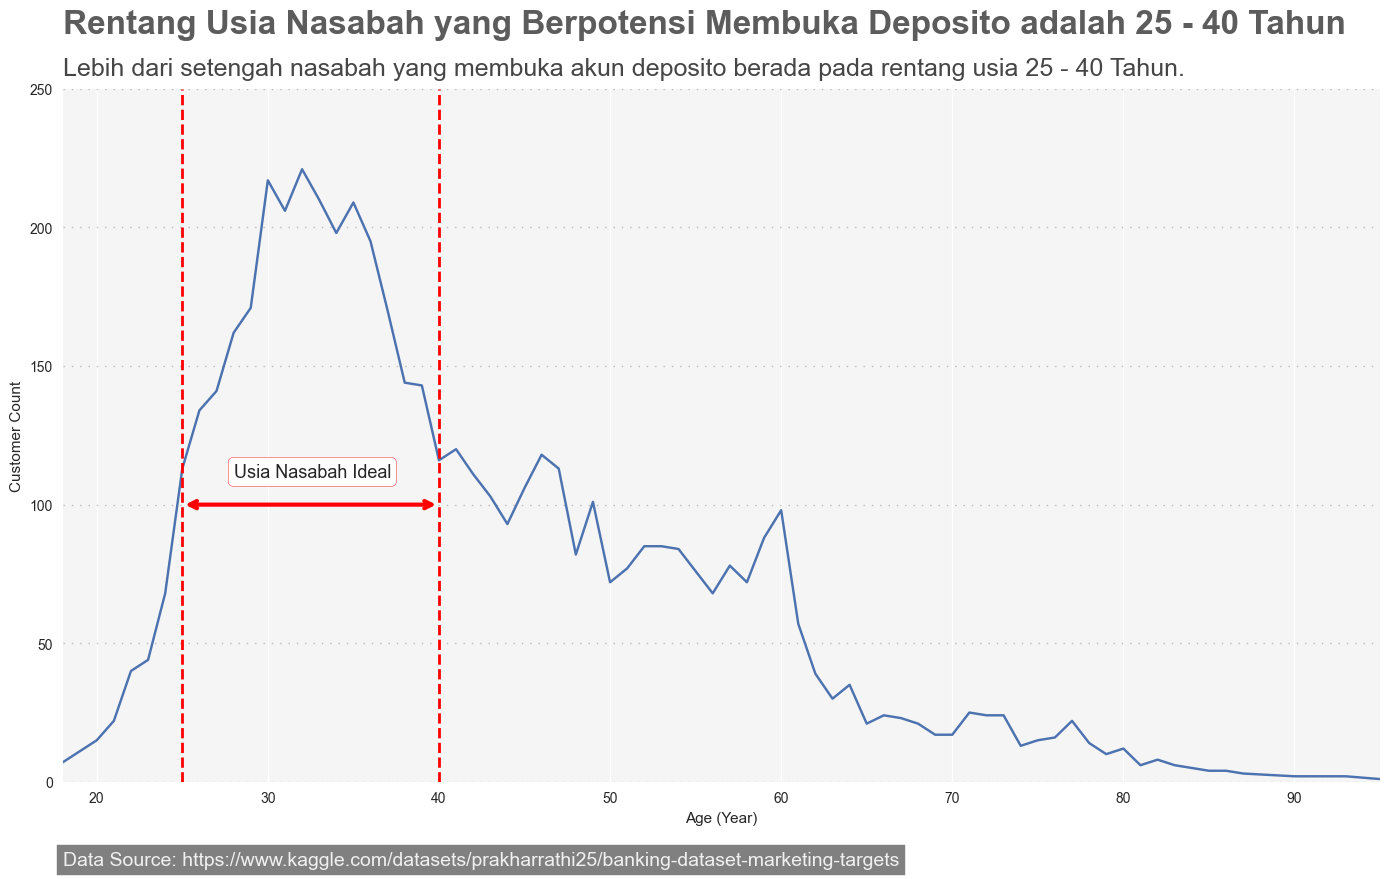

In [45]:
df_plot = df_yes.groupby('age').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='age', y='y')
plt.ylabel('Customer Count')
plt.xlabel('Age (Year)')
plt.axvline(x=25, linewidth=2, color='red', linestyle='--')
plt.axvline(x=40, linewidth=2, color='red', linestyle='--')
plt.xlim(18, 95)
plt.ylim(0, 250)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
ax1.set_facecolor('whitesmoke')
    
plt.text(x = 18, y = 270, s = "Rentang Usia Nasabah yang Berpotensi Membuka Deposito adalah 25 - 40 Tahun",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = 18, y = 255,
               s = 'Lebih dari setengah nasabah yang membuka akun deposito berada pada rentang usia 25 - 40 Tahun.',
              fontsize = 18, alpha = .85)
plt.text(x = 18, y = -30,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.annotate('', xy =(25, 100),
                xytext =(40, 100), 
                arrowprops = dict(arrowstyle="<->", connectionstyle="arc3", color='r', lw=3),
                fontsize=13)

plt.text(x = 28, y = 110,
    s = 'Usia Nasabah Ideal',fontsize = 13, bbox = dict(boxstyle ="round", fc ="1", color='r'))
plt.savefig('bizinsight3.png')
plt.show()

In [46]:
df2 = df_train.copy()

In [47]:
def dura_cat(x):
    if (x['duration'] > 258):
        dura_cat = 'Above Mean'
    else:
        dura_cat = 'Below Mean'
    return dura_cat


df2['dura_above_mean'] = df2.apply(lambda x: dura_cat(x), axis=1)

df2_group = df2.groupby(['dura_above_mean', 'y']).agg({'age':'count'}).reset_index().rename(columns={'age':'customer count'})
df2_group

,dura_above_mean,y,customer count
0,Above Mean,no,11205
1,Above Mean,yes,3827
2,Below Mean,no,28717
3,Below Mean,yes,1462


In [48]:
dfs1 = df2.groupby(['dura_above_mean', 'y'])['age'].count().reset_index(name='UniqueCustomer')
dfs2 = df2.groupby(['dura_above_mean'])['age'].count().reset_index(name='AllUniqueCustomer')

dfs = dfs1.merge(dfs2, how = 'inner', on='dura_above_mean')
dfs['PercentUniqueCustomer'] = round(dfs['UniqueCustomer']*100.0/dfs['AllUniqueCustomer'], 2) 

dfs.head()

,dura_above_mean,y,UniqueCustomer,AllUniqueCustomer,PercentUniqueCustomer
0,Above Mean,no,11205,15032,74.54
1,Above Mean,yes,3827,15032,25.46
2,Below Mean,no,28717,30179,95.16
3,Below Mean,yes,1462,30179,4.84


In [49]:
df3 = df_train.copy()

In [50]:
def dura_cat(x):
    if (x['duration'] > 180):
        dura_cat = 'Above Median'
    else:
        dura_cat = 'Below Median'
    return dura_cat
        
df3['dura_above_med'] = df3.apply(lambda x: dura_cat(x), axis=1)

In [51]:
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,dura_above_med
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Above Median
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Below Median
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Below Median
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Below Median
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Above Median
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Above Median
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Above Median
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Above Median
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Above Median


In [52]:
dfs1 = df3.groupby(['dura_above_med', 'y'])['age'].count().reset_index(name='UniqueCustomer')
dfs2 = df3.groupby(['dura_above_med'])['age'].count().reset_index(name='AllUniqueCustomer')

dfs = dfs1.merge(dfs2, how = 'inner', on='dura_above_med')
dfs['PercentUniqueCustomer'] = round(dfs['UniqueCustomer']*100.0/dfs['AllUniqueCustomer'], 2) 

dfs.head()

,dura_above_med,y,UniqueCustomer,AllUniqueCustomer,PercentUniqueCustomer
0,Above Median,no,17971,22551,79.69
1,Above Median,yes,4580,22551,20.31
2,Below Median,no,21951,22660,96.87
3,Below Median,yes,709,22660,3.13


# Stage 2 : Data Preprocessing

## Handling Outliers

### IQR

In [53]:
df_iqr = df_train.copy()
outliers_cols_list = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

print(f'Jumlah baris sebelum memfilter outlier: {len(df_iqr)}')

filtered_entries = np.array([True] * len(df_iqr))

for col in outliers_cols_list:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_iqr[col] >= low_limit) & (df_iqr[col] <= high_limit)) & filtered_entries
    
df_iqr = df_iqr[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_iqr)}')
print(f'Jumlah data yang difilter: {round((len(df_train)-len(df_iqr))/len(df_train)*100, 2)}%')

Jumlah baris sebelum memfilter outlier: 45211
Jumlah baris setelah memfilter outlier: 28193
Jumlah data yang difilter: 37.64%


### Z-Score

In [54]:
df_zscore = df_train.copy()
outliers_cols_list = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

print(f'Jumlah baris sebelum memfilter outlier: {len(df_zscore)}')

filtered_entries = np.array([True] * len(df_zscore))

for col in outliers_cols_list:
    zscore = abs(stats.zscore(df_zscore[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_zscore = df_zscore[filtered_entries].reset_index().drop(columns=['index']) # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_zscore)}')
print(f'Jumlah data yang difilter: {round((len(df_train)-len(df_zscore))/len(df_train)*100, 2)}%')

Jumlah baris sebelum memfilter outlier: 45211
Jumlah baris setelah memfilter outlier: 40209
Jumlah data yang difilter: 11.06%


Kita akan menggunakan metode handling outliers Z-Score karena data yang terbuang tidak terlalu banyak.

## Feature Transformation (Numerical)

Dari visualisasi distribution plot dan boxplot dapat diketahui bahwa seluruh kolom numerik tidak berdistribusi normal. Berdasarkan referensi berikut https://www.geeksforgeeks.org/normalization-vs-standardization/, metode yang cocok untuk distribusi data tidak normal/gaussian adalah dengan normalisasi.

Selain dari boxplot dan distribution plot, untuk mengetahui apakah data berdistribusi normal atau tidak, dapat menerapkan `Kolmogorov-Smirnov Test`.

### Kolmogorov-Smirnov Test

In [55]:
import math
from scipy.stats import kstest

In [56]:
for i in nums:
  statistics,pvalue = kstest(df_zscore[i],'norm')
  print(f'{i}: statistics=%.3f, pvalue=%.8f' % (statistics,pvalue))

age: statistics=1.000, pvalue=0.00000000
balance: statistics=0.826, pvalue=0.00000000
day: statistics=0.971, pvalue=0.00000000
duration: statistics=1.000, pvalue=0.00000000
campaign: statistics=0.841, pvalue=0.00000000
pdays: statistics=0.700, pvalue=0.00000000
previous: statistics=0.500, pvalue=0.00000000


dari nilai pvalue yang <= 0.05 sehingga hipotesis nol ditolak dan distribusi yang ada bukanlah normal/gausian

In [57]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [58]:
df_zscore_num = df_zscore[nums]
df_zscore_num

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
40204,23,113,17,266,1,-1,0
40205,25,505,17,386,2,-1,0
40206,51,825,17,977,3,-1,0
40207,71,1729,17,456,2,-1,0


Terdapat nilai -1 pada pdays, perlu diperhatikan

#### Standardization

#### Standardization

In [59]:
# df_zscore_num_std = pd.DataFrame(StandardScaler().fit_transform(df_zscore_num))
# df_zscore_num_std.columns = nums
# # X_train_num_standard = X_train_num_standard.drop(columns=['pdays'])
# df_zscore_num_std

In [60]:
# # Membuat distplot untuk seluruh numerical features
# plt.figure(figsize=(25, 10))
# for i in range(0, len(nums)):
#     plt.subplot(2,4, i+1)
#     sns.distplot(df_zscore_num_std[nums[i]], color='cadetblue')
#     plt.title('Distplot of {}'.format(nums[i]))
#     plt.suptitle('Distplot for Numerical Features\n', fontsize=16, fontweight='medium')
#     plt.tight_layout()
# plt.show()

In [61]:
# df_zscore_num_std = pd.DataFrame(StandardScaler().fit_transform(df_zscore_num))
# df_zscore_num_std.columns = nums
# # X_train_num_standard = X_train_num_standard.drop(columns=['pdays'])
# df_zscore_num_std

In [62]:
# # Membuat distplot untuk seluruh numerical features
# plt.figure(figsize=(25, 10))
# for i in range(0, len(nums)):
#     plt.subplot(2,4, i+1)
#     sns.distplot(df_zscore_num_std[nums[i]], color='cadetblue')
#     plt.title('Distplot of {}'.format(nums[i]))
#     plt.suptitle('Distplot for Numerical Features\n', fontsize=16, fontweight='medium')
#     plt.tight_layout()
# plt.show()

#### Normalization

In [63]:
df_zscore_num_norm = pd.DataFrame(MinMaxScaler().fit_transform(df_zscore_num))
df_zscore_num_norm.columns = nums
# X_train_num_norm = X_train_num_norm.drop(columns=['pdays'])
df_zscore_num_norm

,age,balance,day,duration,campaign,pdays,previous
0,0.740741,0.518754,0.133333,0.253398,0.000000,0.0,0.0
1,0.481481,0.396769,0.133333,0.146602,0.000000,0.0,0.0
2,0.277778,0.395211,0.133333,0.073786,0.000000,0.0,0.0
3,0.537037,0.481997,0.133333,0.089320,0.000000,0.0,0.0
4,0.277778,0.395153,0.133333,0.192233,0.000000,0.0,0.0
...,...,...,...,...,...,...,...
40204,0.092593,0.401616,0.533333,0.258252,0.000000,0.0,0.0
40205,0.129630,0.424235,0.533333,0.374757,0.090909,0.0,0.0
40206,0.611111,0.442701,0.533333,0.948544,0.181818,0.0,0.0
40207,0.981481,0.494864,0.533333,0.442718,0.090909,0.0,0.0


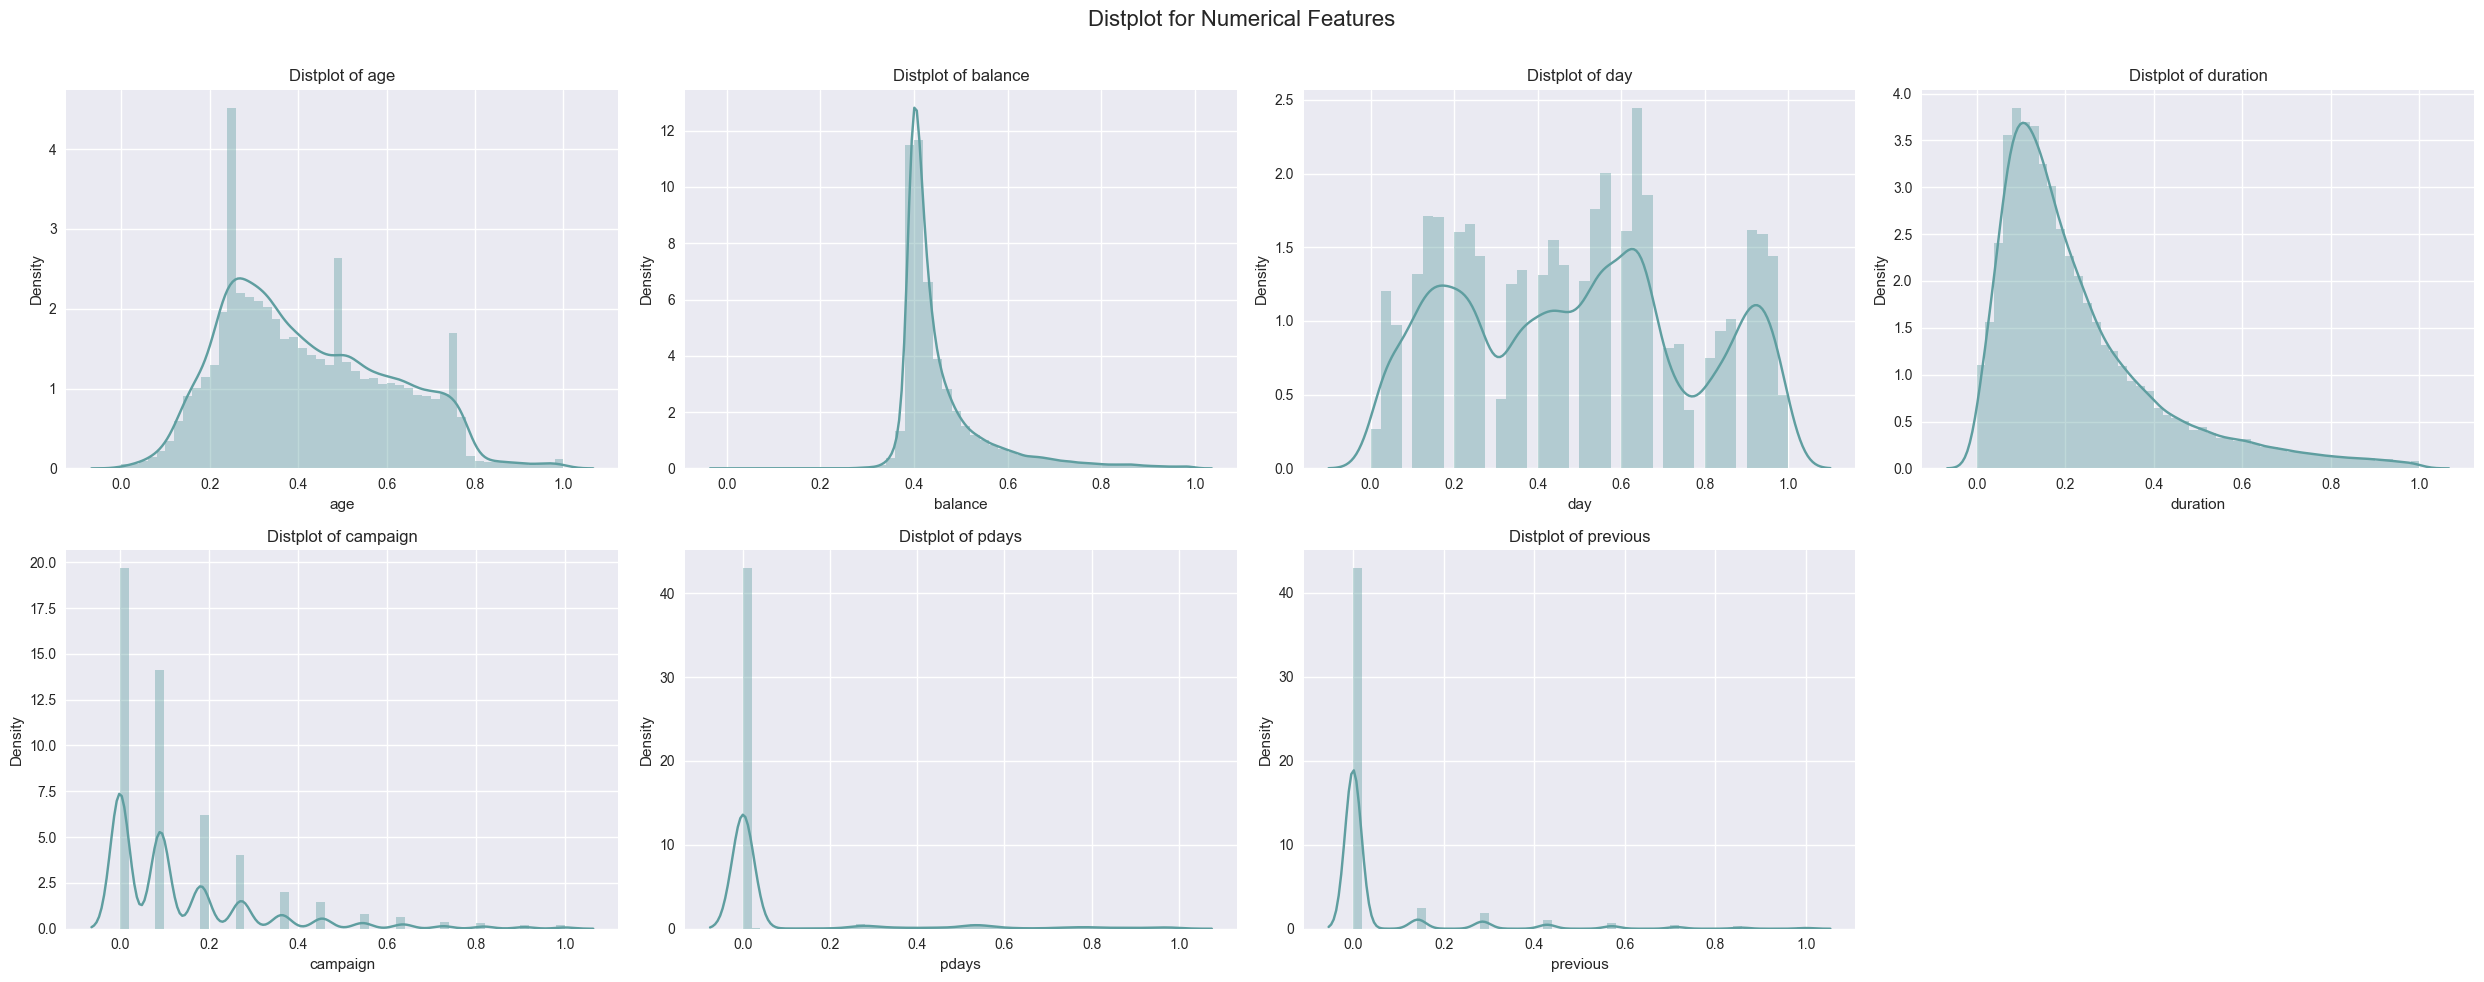

In [64]:
# Membuat distplot untuk seluruh numerical features
plt.figure(figsize=(25, 10))
for i in range(0, len(nums)):
    plt.subplot(2,4, i+1)
    sns.distplot(df_zscore_num_norm[nums[i]], color='cadetblue')
    plt.title('Distplot of {}'.format(nums[i]))
    plt.suptitle('Distplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

In [65]:
df_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(df_test[nums]))
df_test_norm.columns = nums
# X_train_num_norm = X_train_num_norm.drop(columns=['pdays'])
df_test_norm

,age,balance,day,duration,campaign,pdays,previous
0,0.161765,0.068455,0.600000,0.024826,0.000000,0.000000,0.00
1,0.205882,0.108750,0.333333,0.071500,0.000000,0.389908,0.16
2,0.235294,0.062590,0.500000,0.059914,0.000000,0.379587,0.04
3,0.161765,0.064281,0.066667,0.064548,0.061224,0.000000,0.00
4,0.588235,0.044469,0.133333,0.073486,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...
4516,0.205882,0.039999,0.966667,0.107580,0.081633,0.000000,0.00
4517,0.558824,0.000000,0.266667,0.049321,0.000000,0.000000,0.00
4518,0.558824,0.048429,0.600000,0.048659,0.204082,0.000000,0.00
4519,0.132353,0.059731,0.166667,0.041377,0.061224,0.243119,0.12


## Feature Encoding (Categorical)

In [66]:
df_cats = df_zscore[cats]
# df_cats = df_cats.drop(columns=['month'])
df_cats

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
40204,student,single,tertiary,no,no,no,cellular,nov,unknown,yes
40205,technician,single,secondary,no,no,yes,cellular,nov,unknown,yes
40206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
40207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes


In [67]:
df_test_cats = df_test[cats]
# df_cats = df_cats.drop(columns=['month'])
df_test_cats

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


**Notes:** <br>
Label Encoding : education, default, housing, loan <br>
One Hot Encoding : job, marital, contact, month, poutcome

#### Label Encoding

In [68]:
mapping_education = {
    'primary' : 1,
    'secondary' : 2,
    'tertiary' : 3,
    'unknown' : 0
}

df_cats['education'] = df_cats['education'].map(mapping_education)
df_test_cats['education'] = df_test_cats['education'].map(mapping_education)

In [69]:
df_test_cats

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,1,no,no,no,cellular,oct,unknown,no
1,services,married,2,no,yes,yes,cellular,may,failure,no
2,management,single,3,no,yes,no,cellular,apr,failure,no
3,management,married,3,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,2,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,2,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,3,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,2,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,2,no,no,no,cellular,feb,other,no


In [70]:
mapping_default = {
    'no' : 0,
    'yes' : 1
}

df_cats['default'] = df_cats['default'].map(mapping_default)
df_test_cats['default'] = df_test_cats['default'].map(mapping_default)

In [71]:
mapping_housing = {
    'no' : 0,
    'yes' : 1
}

df_cats['housing'] = df_cats['housing'].map(mapping_housing)
df_test_cats['housing'] = df_test_cats['housing'].map(mapping_housing)

In [72]:
df_test_cats

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,1,0,0,no,cellular,oct,unknown,no
1,services,married,2,0,1,yes,cellular,may,failure,no
2,management,single,3,0,1,no,cellular,apr,failure,no
3,management,married,3,0,1,yes,unknown,jun,unknown,no
4,blue-collar,married,2,0,1,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,2,0,1,no,cellular,jul,unknown,no
4517,self-employed,married,3,1,1,yes,unknown,may,unknown,no
4518,technician,married,2,0,0,no,cellular,aug,unknown,no
4519,blue-collar,married,2,0,0,no,cellular,feb,other,no


In [73]:
mapping_loan = {
    'no' : 0,
    'yes' : 1
}

df_cats['loan'] = df_cats['loan'].map(mapping_loan)
df_test_cats['loan'] = df_test_cats['loan'].map(mapping_loan)

In [74]:
mapping_y = {
    'no' : 0,
    'yes' : 1
}
df_cats['y'] = df_cats['y'].map(mapping_y)
df_test_cats['y'] = df_test_cats['y'].map(mapping_y)

#### One Hot Encoding

In [75]:
# OHE
for cat in ['job','marital', 'contact', 'poutcome', 'month']:
  onehots = pd.get_dummies(df_cats[cat], prefix=cat)
  df_cats = df_cats.join(onehots)

In [76]:
df_cats_encoded = df_cats.drop(columns=['job','marital', 'contact', 'poutcome', 'month'])
df_cats_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40209 entries, 0 to 40208
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   education          40209 non-null  int64
 1   default            40209 non-null  int64
 2   housing            40209 non-null  int64
 3   loan               40209 non-null  int64
 4   y                  40209 non-null  int64
 5   job_admin.         40209 non-null  uint8
 6   job_blue-collar    40209 non-null  uint8
 7   job_entrepreneur   40209 non-null  uint8
 8   job_housemaid      40209 non-null  uint8
 9   job_management     40209 non-null  uint8
 10  job_retired        40209 non-null  uint8
 11  job_self-employed  40209 non-null  uint8
 12  job_services       40209 non-null  uint8
 13  job_student        40209 non-null  uint8
 14  job_technician     40209 non-null  uint8
 15  job_unemployed     40209 non-null  uint8
 16  job_unknown        40209 non-null  uint8
 17  marital_divo

In [77]:
for cat in ['job','marital', 'contact', 'poutcome', 'month']:
  onehots = pd.get_dummies(df_test_cats[cat], prefix=cat)
  df_test_cats = df_test_cats.join(onehots)

In [78]:
df_test_cats_encoded = df_test_cats.drop(columns=['job','marital', 'contact', 'poutcome', 'month'])
df_test_cats_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   education          4521 non-null   int64
 1   default            4521 non-null   int64
 2   housing            4521 non-null   int64
 3   loan               4521 non-null   int64
 4   y                  4521 non-null   int64
 5   job_admin.         4521 non-null   uint8
 6   job_blue-collar    4521 non-null   uint8
 7   job_entrepreneur   4521 non-null   uint8
 8   job_housemaid      4521 non-null   uint8
 9   job_management     4521 non-null   uint8
 10  job_retired        4521 non-null   uint8
 11  job_self-employed  4521 non-null   uint8
 12  job_services       4521 non-null   uint8
 13  job_student        4521 non-null   uint8
 14  job_technician     4521 non-null   uint8
 15  job_unemployed     4521 non-null   uint8
 16  job_unknown        4521 non-null   uint8
 17  marital_divorc

## Merge Numerical and Categorical Dataframe

In [79]:
# df_std = df_zscore_num_std.join(df_cats_encoded).rename(columns={'job_admin.':'job_admin'})
# df_std

In [80]:
df_norm = df_zscore_num_norm.join(df_cats_encoded).rename(columns={'job_admin.':'job_admin'})
df_norm

,age,balance,day,duration,campaign,pdays,previous,education,default,housing,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.740741,0.518754,0.133333,0.253398,0.000000,0.0,0.0,3,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.481481,0.396769,0.133333,0.146602,0.000000,0.0,0.0,2,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.277778,0.395211,0.133333,0.073786,0.000000,0.0,0.0,2,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.537037,0.481997,0.133333,0.089320,0.000000,0.0,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.277778,0.395153,0.133333,0.192233,0.000000,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40204,0.092593,0.401616,0.533333,0.258252,0.000000,0.0,0.0,3,0,0,...,0,0,0,0,0,0,0,1,0,0
40205,0.129630,0.424235,0.533333,0.374757,0.090909,0.0,0.0,2,0,0,...,0,0,0,0,0,0,0,1,0,0
40206,0.611111,0.442701,0.533333,0.948544,0.181818,0.0,0.0,3,0,0,...,0,0,0,0,0,0,0,1,0,0
40207,0.981481,0.494864,0.533333,0.442718,0.090909,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [81]:
df_test_norm_merge = df_test_norm.join(df_test_cats_encoded).rename(columns={'job_admin.':'job_admin'})
df_test_norm_merge

,age,balance,day,duration,campaign,pdays,previous,education,default,housing,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.161765,0.068455,0.600000,0.024826,0.000000,0.000000,0.00,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.205882,0.108750,0.333333,0.071500,0.000000,0.389908,0.16,2,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.235294,0.062590,0.500000,0.059914,0.000000,0.379587,0.04,3,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.161765,0.064281,0.066667,0.064548,0.061224,0.000000,0.00,3,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.588235,0.044469,0.133333,0.073486,0.000000,0.000000,0.00,2,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.205882,0.039999,0.966667,0.107580,0.081633,0.000000,0.00,2,0,1,...,0,0,0,1,0,0,0,0,0,0
4517,0.558824,0.000000,0.266667,0.049321,0.000000,0.000000,0.00,3,1,1,...,0,0,0,0,0,0,1,0,0,0
4518,0.558824,0.048429,0.600000,0.048659,0.204082,0.000000,0.00,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,0.132353,0.059731,0.166667,0.041377,0.061224,0.243119,0.12,2,0,0,...,0,1,0,0,0,0,0,0,0,0


# Stage 3: Modeling

In [796]:
def eval(model):
    # predict train set
    y_pred_train_def = model.predict(X_train)

    # predict test set
    y_pred_test_def = model.predict(X_test)
    
    # Calculate accuracy, precision, recall, and f1-score
    train_score_def = round((model.score(X_train, y_train) * 100), 2)
    test_score_def = round((model.score(X_test, y_test) * 100), 2)

    prec_score_train_def = round((metrics.precision_score(y_train, y_pred_train_def)) * 100, 2)
    prec_score_test_def = round((metrics.precision_score(y_test, y_pred_test_def)) * 100, 2)

    recall_score_train_def = round((metrics.recall_score(y_train, y_pred_train_def)) * 100, 2)
    recall_score_test_def = round((metrics.recall_score(y_test, y_pred_test_def)) * 100, 2)

    f1_train_def = round(metrics.f1_score(y_train, y_pred_train_def)*100, 2)
    f1_test_def = round(metrics.f1_score(y_test, y_pred_test_def)*100, 2)

    roc_train_proba = round(metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:,1])*100, 2)
    roc_test_proba = round(metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])*100, 2)
    
    roc_train = round(metrics.roc_auc_score(y_train, model.predict(X_train))*100, 2)
    roc_test = round(metrics.roc_auc_score(y_test, model.predict(X_test))*100, 2)    
    
    # roc_cross_val = cross_validate(model, X, y, cv=3, scoring='roc_auc', return_train_score=True)
    
    # acc_cross_val = cross_validate(model, X, y, cv=3, scoring='accuracy', return_train_score=True)
    
    # f1_cross_val = cross_validate(model, X, y, cv=3, scoring='f1', return_train_score=True)

    print('Training Accuracy : {}%'.format(train_score_def))
    print('Test Accuracy : {}%'.format(test_score_def))
    print('Precision Train : {}%'.format(prec_score_train_def))
    print('Precision Test : {}%'.format(prec_score_test_def))
    print('Recall Train : {}%'.format(recall_score_train_def))
    print('Recall Test : {}%'.format(recall_score_test_def))
    print('F1 Score Train : {}%'.format(f1_train_def))
    print('F1 Score Test : {}%'.format(f1_test_def))
    print('ROC/AUC Train - Proba: {}%'.format(roc_train_proba))
    print('ROC/AUC Test - Proba: {}%'.format(roc_test_proba))
    print('ROC/AUC Train: {}%'.format(roc_train))
    print('ROC/AUC Test: {}%'.format(roc_test))    
    # print('roc (crossval train): '+ str(round(roc_cross_val['train_score'].mean()*100,2)) + ' %')
    # print('roc (crossval test): '+ str(round(roc_cross_val['test_score'].mean()*100,2)) + ' %')
    # print('f1 (crossval train): '+ str(round(f1_cross_val['train_score'].mean()*100,2)) + ' %')
    # print('f1 (crossval test): '+ str(round(f1_cross_val['test_score'].mean()*100,2)) + ' %')
    
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [740]:
def eval_test(model):
    # predict test set
    y_pred_test_def = model.predict(X_df_test)
    
    # Calculate accuracy, precision, recall, and f1-score
    test_score_def = round((model.score(X_df_test, y_df_test) * 100), 2)

    prec_score_test_def = round((metrics.precision_score(y_df_test, y_pred_test_def)) * 100, 2)

    recall_score_test_def = round((metrics.recall_score(y_df_test, y_pred_test_def)) * 100, 2)

    f1_test_def = round(metrics.f1_score(y_df_test, y_pred_test_def)*100, 2)

    roc_test_proba = round(metrics.roc_auc_score(y_df_test, model.predict_proba(X_df_test)[:,1])*100, 2)
    
    roc_test = round(metrics.roc_auc_score(y_df_test, model.predict(X_df_test))*100, 2)    
    
    # roc_cross_val = cross_validate(model, X, y, cv=3, scoring='roc_auc', return_train_score=True)
    
    # acc_cross_val = cross_validate(model, X, y, cv=3, scoring='accuracy', return_train_score=True)
    
    # f1_cross_val = cross_validate(model, X, y, cv=3, scoring='f1', return_train_score=True)

    print('Test Accuracy : {}%'.format(test_score_def))
    print('Precision Test : {}%'.format(prec_score_test_def))
    print('Recall Test : {}%'.format(recall_score_test_def))
    print('F1 Score Test : {}%'.format(f1_test_def))
    print('ROC/AUC Test - Proba: {}%'.format(roc_test_proba))
    print('ROC/AUC Test: {}%'.format(roc_test))    
    # print('accuracy (crossval train): '+ str(round(acc_cross_val['train_score'].mean()*100,2)) + ' %')
    # print('accuracy (crossval test): '+ str(round(acc_cross_val['test_score'].mean()*100,2)) + ' %')
    # print('f1 (crossval train): '+ str(round(f1_cross_val['train_score'].mean()*100,2)) + ' %')
    # print('f1 (crossval test): '+ str(round(f1_cross_val['test_score'].mean()*100,2)) + ' %')

## Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

X = df_norm.drop(columns=['y'])
y = df_norm['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
X_df_test = df_test_norm_merge.drop(columns=['y'])
y_df_test = df_test_norm_merge['y']

X_df_test

,age,balance,day,duration,campaign,pdays,previous,education,default,housing,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.161765,0.068455,0.600000,0.024826,0.000000,0.000000,0.00,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.205882,0.108750,0.333333,0.071500,0.000000,0.389908,0.16,2,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.235294,0.062590,0.500000,0.059914,0.000000,0.379587,0.04,3,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.161765,0.064281,0.066667,0.064548,0.061224,0.000000,0.00,3,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.588235,0.044469,0.133333,0.073486,0.000000,0.000000,0.00,2,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.205882,0.039999,0.966667,0.107580,0.081633,0.000000,0.00,2,0,1,...,0,0,0,1,0,0,0,0,0,0
4517,0.558824,0.000000,0.266667,0.049321,0.000000,0.000000,0.00,3,1,1,...,0,0,0,0,0,0,1,0,0,0
4518,0.558824,0.048429,0.600000,0.048659,0.204082,0.000000,0.00,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,0.132353,0.059731,0.166667,0.041377,0.061224,0.243119,0.12,2,0,0,...,0,1,0,0,0,0,0,0,0,0


## Class Imbalance

In [ ]:
df_train['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [ ]:
df_train['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

**Note:** Proportion of minority class is about `12%`, dengan proporsi tersebut, kategori derajat ketimpangannya termasuk kedalam derajat ketimpangan `Moderate` (berdasarkan sumber: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data).

Berdasarkan nilai imbalance tersebut kita akan menggunakan metrik evaluasi F1 Score, karena F1 Score cocok digunakan untuk data yang memiliki class imbalance dengan memperhatikan nilai precision dan recall.

## Model Selection

In [90]:
from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [91]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_validate

In [434]:
from collections import Counter

# count examples in each class
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 8.876


In [435]:
models = []
models.append(LogisticRegression(random_state=42, class_weight='balanced'))
# models.append(LinearDiscriminantAnalysis())
# models.append(QuadraticDiscriminantAnalysis())
# models.append(GradientBoostingClassifier(random_state=42))
# models.append(AdaBoostClassifier(random_state=42))
models.append(RandomForestClassifier(random_state=42, class_weight='balanced'))
models.append(ExtraTreesClassifier(random_state=42, class_weight='balanced'))
# models.append(GaussianNB())
# models.append(KNeighborsClassifier())
models.append(SVC(random_state=42, probability=True, class_weight='balanced'))
models.append(DecisionTreeClassifier(random_state=42, class_weight='balanced'))
models.append(XGBClassifier(random_state=42, scale_pos_weight=estimate))
models.append(XGBRFClassifier(random_state=42, scale_pos_weight=estimate))
# models.append(CatBoostClassifier(random_state=42, iterations=10))
models.append(LGBMClassifier(random_state=42, class_weight='balanced'))

In [841]:
model_list = ['Logistic Regression', 'Random Forest', 'Extra Trees',
              'SVM', 'DecisionTree', 'XGB', 'XGBRF', 'LGBM']

acc_train_list = []
acc_test_list = []

auc_train_list = []
auc_test_list = []

auc_train_prob_list = []
auc_test_prob_list = []

auc_train_cv_list = []
auc_test_cv_list = []

rec_train_list = []
rec_test_list = []

pre_train_list = []
pre_test_list = []

f1_train_list = []
f1_test_list = []

acc_train_cv_list = []
acc_test_cv_list = []

f1_train_cv_list = []
f1_test_cv_list = []

auc_list = []

cm_list = []

for model in models:
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    acc_train_list.append(metrics.accuracy_score(y_train, y_pred_train))
    acc_test_list.append(metrics.accuracy_score(y_test, y_pred_test))    
    
    # cv_acc_score = cross_validate(model, X, y, cv=3, scoring='accuracy', return_train_score=True)
    # acc_train_cv_list.append(cv_acc_score['train_score'].mean())
    # acc_test_cv_list.append(cv_acc_score['test_score'].mean())
    
    auc_train_list.append(metrics.roc_auc_score(y_train, y_pred_train))
    auc_test_list.append(metrics.roc_auc_score(y_test, y_pred_test))    
    
    auc_train_prob_list.append(round(metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:,1])*100, 2))
    auc_test_prob_list.append(round(metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])*100, 2))
    
    # cv_roc_auc_score = cross_validate(model, X, y, cv=3, scoring='roc_auc', return_train_score=True)
    # auc_train_cv_list.append(cv_roc_auc_score['train_score'].mean())
    # auc_test_cv_list.append(cv_roc_auc_score['test_score'].mean())
    
    rec_train_list.append(metrics.recall_score(y_train, y_pred_train))
    rec_test_list.append(metrics.recall_score(y_test, y_pred_test))
    
    pre_train_list.append(metrics.precision_score(y_train, y_pred_train))
    pre_test_list.append(metrics.precision_score(y_test, y_pred_test))
    
    f1_train_list.append(metrics.f1_score(y_train, y_pred_train))
    f1_test_list.append(metrics.f1_score(y_test, y_pred_test))   
    
    # cv_f1_score = cross_validate(model, X, y, cv=3, scoring='f1', return_train_score=True)
    # f1_train_cv_list.append(cv_f1_score['train_score'].mean())
    # f1_test_cv_list.append(cv_f1_score['test_score'].mean())    
    
    # fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred_test)
    # auc_list.append(round(metrics.auc(fpr, tpr),2))
    # cm_list.append(confusion_matrix(y_test, y_pred_test))

In [888]:
result_df = pd.DataFrame({'Model':model_list, 
                          'Accuracy Train': acc_train_list, 'Accuracy Test': acc_test_list,
                          # 'Accuracy_CV Train': acc_train_cv_list, 'Accuracy_CV Test': acc_test_cv_list,
                          'ROC_AUC Train': auc_train_list, 'ROC_AUC Test': auc_test_list, 
                          'ROC_AUC_Prob Train': auc_train_prob_list, 'ROC_AUC_Prob Test': auc_test_prob_list, 
                          # 'ROC_AUC_CV Train': auc_train_cv_list, 'ROC_AUC_CV Test': auc_test_cv_list,
                          'Recall Train': rec_train_list, 'Recall Test': rec_test_list,
                          'Precision Train': pre_train_list, 'Precision Test': pre_test_list,
                          'F1 Train': f1_train_list, 'F1 Test': f1_test_list})
                          # 'F1 Train CV': f1_train_cv_list, 'F1 Test CV': f1_test_cv_list})
result_df.sort_values(by='F1 Test', ascending=False).reset_index(drop=True)

,Model,Accuracy Train,Accuracy Test,ROC_AUC Train,ROC_AUC Test,ROC_AUC_Prob Train,ROC_AUC_Prob Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,XGB,0.934094,0.885683,0.956796,0.827210,99.12,92.51,0.985263,0.754153,0.607661,0.456052,0.751707,0.568388
1,LGBM,0.881049,0.863135,0.915921,0.861210,96.75,93.06,0.959649,0.858804,0.458277,0.411133,0.620322,0.556063
2,SVM,0.856427,0.841582,0.880585,0.844807,94.26,92.01,0.910877,0.848837,0.406705,0.371501,0.562331,0.516814
3,Logistic Regression,0.843779,0.837603,0.837432,0.826351,91.39,90.68,0.829474,0.812292,0.376733,0.360752,0.518137,0.499617
4,XGBRF,0.814006,0.802785,0.832077,0.810704,91.57,89.31,0.854737,0.820598,0.335676,0.313551,0.482042,0.453731
5,DecisionTree,1.000000,0.888502,1.000000,0.677019,100.00,67.70,1.000000,0.412791,1.000000,0.437885,1.000000,0.424968
6,Extra Trees,1.000000,0.910553,1.000000,0.643481,100.00,91.02,1.000000,0.309801,1.000000,0.600644,1.000000,0.408767
7,Random Forest,1.000000,0.912542,1.000000,0.622801,100.00,92.28,1.000000,0.260797,1.000000,0.655532,1.000000,0.373143


Berdasarkan modeling diatas, didapatkan bahwa XGB merupakan model dengan nilai F1 Score tertinggi, disusul oleh LGBM di urutan kedua. Karena pada project kali ini kami juga memperhatikan nilai recall, maka kami akan menggunakan algoritma LGBM karena LGBM memiliki nilai recall tertinggi dibandingkan dengan model yang lainnya.

## Modeling LGBM

In [853]:
lgbm = LGBMClassifier(random_state=42, class_weight='balanced')
lgbm.fit(X_train, y_train)

# predict train set
y_pred_train_lgbm = lgbm.predict(X_train)

# predict test set
y_pred_test_lgbm = lgbm.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
eval(lgbm)

Training Accuracy : 88.1%
Test Accuracy : 86.31%
Precision Train : 45.83%
Precision Test : 41.11%
Recall Train : 95.96%
Recall Test : 85.88%
F1 Score Train : 62.03%
F1 Score Test : 55.61%
ROC/AUC Train - Proba: 96.75%
ROC/AUC Test - Proba: 93.06%
ROC/AUC Train: 91.59%
ROC/AUC Test: 86.12%


### Hyperparameter Tuning
<b>Hyperparameter yang biasa di tuning pada LGBM:</b> https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

In [865]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

num_leaves = [int(x) for x in np.linspace(2, 100, 20)]
max_depth = [int(x) for x in np.linspace(-1, 100, 20)]
learning_rate = [float(x) for x in np.linspace(0.00001, 0.5, 20)]
n_estimators = [int(x) for x in np.linspace(100, 250, 20)]
# min_split_gain = [float(x) for x in np.linspace(0.0001, 50, 20)]
# min_child_samples = [int(x) for x in np.linspace(1, 1000, 20)]
# colsample_bytree = [float(x) for x in np.linspace(0.0001, 0.5, 20)]
hyperparameters = dict(num_leaves=num_leaves, max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators)
          
lgbm = LGBMClassifier(random_state=42, class_weight='balanced')
tuned_lgbm = RandomizedSearchCV(lgbm, hyperparameters, scoring='roc_auc', random_state=42, cv=5)

In [866]:
tuned_lgbm.fit(X_train, y_train)
show_best_hyperparameter(tuned_lgbm)

{'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.15790157894736845, 'max_depth': 89, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 131, 'n_jobs': -1, 'num_leaves': 32, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [903]:
lgbm_tuned = LGBMClassifier(random_state=42, colsample_bytree=0.4212105263157895, num_leaves=32, max_depth=89, learning_rate=0.15790157894736845, 
                            min_split_gain=0.001, min_child_samples=20, n_estimators=131, class_weight='balanced')
lgbm_tuned.fit(X_train, y_train)
eval(lgbm_tuned)

Training Accuracy : 90.28%
Test Accuracy : 87.4%
Precision Train : 51.06%
Precision Test : 43.18%
Recall Train : 97.54%
Recall Test : 83.14%
F1 Score Train : 67.03%
F1 Score Test : 56.84%
ROC/AUC Train - Proba: 97.74%
ROC/AUC Test - Proba: 93.18%
ROC/AUC Train: 93.5%
ROC/AUC Test: 85.51%


In [869]:
# predict train set
y_pred_train_def = tuned_lgbm.predict(X_train)

# predict test set
y_pred_test_def = tuned_lgbm.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     10859
           1       0.44      0.81      0.57      1204

    accuracy                           0.88     12063
   macro avg       0.71      0.85      0.75     12063
weighted avg       0.92      0.88      0.89     12063



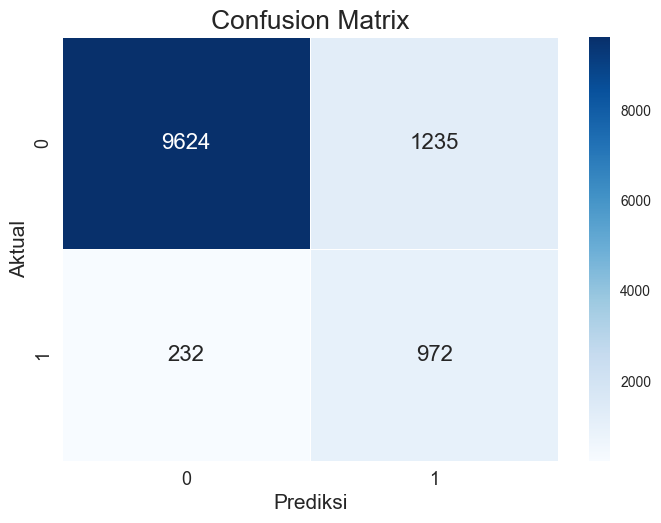

In [870]:
# Confusion Matrix Test
cnf_matrix = confusion_matrix(y_test, y_pred_test_def)
print(classification_report(y_test, y_pred_test_def))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,linewidth=0.5,fmt='d',annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=19)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Prediksi',fontsize=15)
plt.ylabel('Aktual', fontsize=15)
plt.show()

### Validasi Menggunakan Dataframe Test (df_test)

In [873]:
lgbm_tuned.fit(X_df_test, y_df_test)
eval_test(lgbm_tuned)

Test Accuracy : 98.43%
Precision Test : 88.01%
Recall Test : 100.0%
F1 Score Test : 93.62%
ROC/AUC Test - Proba: 99.98%
ROC/AUC Test: 99.11%


In [874]:
y_pred = lgbm_tuned.predict(X_df_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4000
           1       0.88      1.00      0.94       521

    accuracy                           0.98      4521
   macro avg       0.94      0.99      0.96      4521
weighted avg       0.99      0.98      0.98      4521



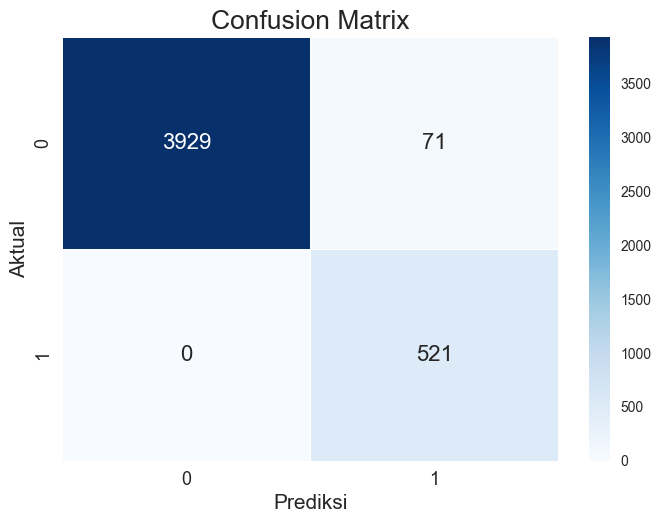

In [875]:
cnf_matrix = confusion_matrix(y_df_test, y_pred)
print(classification_report(y_df_test, y_pred))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,linewidth=0.5,fmt='d',annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=19)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Prediksi',fontsize=15)
plt.ylabel('Aktual', fontsize=15)
plt.show()

### Feature Importance

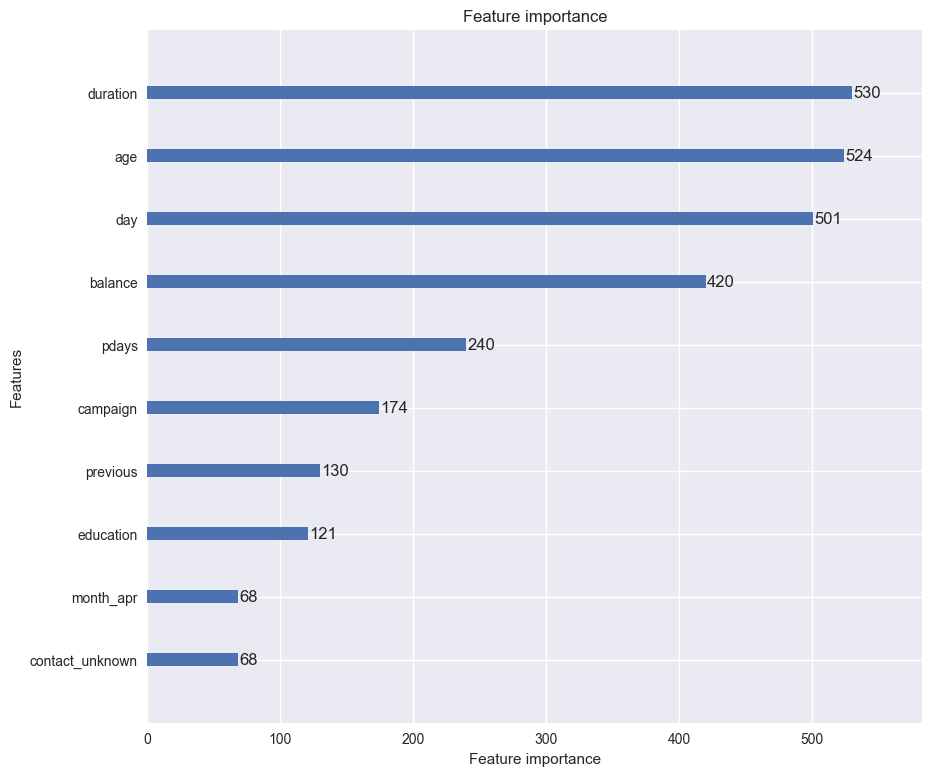

In [920]:
from lightgbm import plot_importance 
# plot_importance(booster=lgbm_tuned, figsize=(15, 9), max_num_features=10, importance_type='auto')

lgbm_tuned.fit(X_train, y_train)

plot_importance(lgbm_tuned, figsize=(10, 9), max_num_features=10, importance_type='auto')

plt.savefig('f_import.png', dpi=100)
plt.show()

### Learning Curve

In [707]:
import numpy as np
from matplotlib import pyplot as plt

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LGBMClassifier(random_state=42, colsample_bytree=c, class_weight='balanced')
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = metrics.roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = metrics.roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param value: 2; train: 0.6174542165950712; test: 0.547644539614561
param value: 28; train: 0.6205105037271289; test: 0.5558245897228947
param value: 54; train: 0.6199028577883203; test: 0.5515947467166978
param value: 80; train: 0.6150566588129698; test: 0.5513196480938417
param value: 106; train: 0.6114592658907788; test: 0.5515957446808512
param value: 133; train: 0.6125742463297097; test: 0.551009564293305
param value: 159; train: 0.6122403144300954; test: 0.5498409331919406
param value: 185; train: 0.6095131505316173; test: 0.548489666136725
param value: 211; train: 0.6108363309352518; test: 0.5508697944122299
param value: 237; train: 0.6096604281071389; test: 0.5508317929759704
param value: 264; train: 0.607645875251509; test: 0.5454545454545455
param value: 290; train: 0.6090654728595412; test: 0.5496062992125984
param value: 316; train: 0.6056024899955536; test: 0.545740498034076
param value: 342; train: 0.6072267591453183; test: 0.551814834297738
param value: 368; train: 0.6080

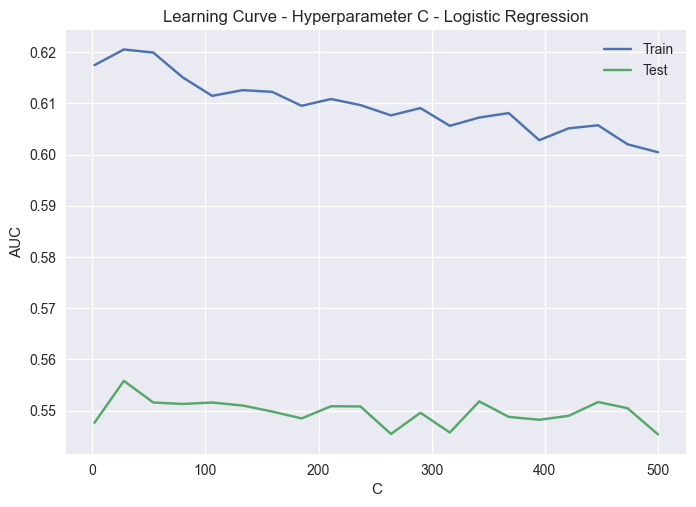

In [757]:
# learning curve find best C value
import numpy as np
# param_values = [float(x) for x in np.linspace(0.001, 0.5, 20)]
param_values = [int(x) for x in np.linspace(2, 500, 20)]
draw_learning_curve(param_values)

## Modeling XGBoost

In [889]:
import collections
counter = collections.Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 8.876


In [916]:
xgb = XGBClassifier(random_state=42, scale_pos_weight =estimate)
xgb.fit(X_train, y_train)

# predict train set
y_pred_train_xgb = xgb.predict(X_train)

# predict test set
y_pred_test_xgb = xgb.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
eval(xgb)

Training Accuracy : 93.41%
Test Accuracy : 88.57%
Precision Train : 60.77%
Precision Test : 45.61%
Recall Train : 98.53%
Recall Test : 75.42%
F1 Score Train : 75.17%
F1 Score Test : 56.84%
ROC/AUC Train - Proba: 99.12%
ROC/AUC Test - Proba: 92.51%
ROC/AUC Train: 95.68%
ROC/AUC Test: 82.72%


## Modeling SVM

In [954]:
svm = SVC(random_state=42, probability=True, class_weight='balanced')
svm.fit(X_train, y_train)

# predict train set
y_pred_train_svm = svm.predict(X_train)

# predict test set
y_pred_test_svm = svm.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
eval(svm)

Training Accuracy : 85.64%
Test Accuracy : 84.16%
Precision Train : 40.67%
Precision Test : 37.15%
Recall Train : 91.09%
Recall Test : 84.88%
F1 Score Train : 56.23%
F1 Score Test : 51.68%
ROC/AUC Train - Proba: 94.26%
ROC/AUC Test - Proba: 92.01%
ROC/AUC Train: 88.06%
ROC/AUC Test: 84.48%


## Modeling Logistic Regression

In [925]:
lr = LogisticRegression(random_state=42, class_weight='balanced')
lr.fit(X_train, y_train)

# predict train set
y_pred_train_lr = lr.predict(X_train)

# predict test set
y_pred_test_lr = lr.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
eval(lr)

Training Accuracy : 84.38%
Test Accuracy : 83.76%
Precision Train : 37.67%
Precision Test : 36.08%
Recall Train : 82.95%
Recall Test : 81.23%
F1 Score Train : 51.81%
F1 Score Test : 49.96%
ROC/AUC Train - Proba: 91.39%
ROC/AUC Test - Proba: 90.68%
ROC/AUC Train: 83.74%
ROC/AUC Test: 82.64%


# Business Simulation

## Before Machine Learning

In [928]:
df_train_bs = df_train.copy()

In [929]:
cost_per_minute = 1.79 #Asumsi cost per minute = 1.79 EUR
df_train_bs['cost'] = df_train_bs['duration']/60*cost_per_minute
df_train_bs

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cost
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,7.786500
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4.504833
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2.267333
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,2.744667
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,5.907000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,29.147167
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,13.604000
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,33.622167
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,15.155333


In [930]:
df_train_bs.describe()

,age,balance,day,duration,campaign,pdays,previous,cost
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,7.701865
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,7.682913
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,3.072833
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,5.370000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,9.516833
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,146.720333


Rata-rata biaya yang dikeluarkan untuk menghubungi 1 nasabah adalah `7.7 EUR`

In [932]:
campaign_cost = round(7.7*len(df_train_bs), 2)
campaign_cost

348124.7

In [933]:
yes_count = df_train_bs['y'].value_counts()[1]
yes_count

5289

In [934]:
#Asumsi keuntungan pertahun dari deposito nasabah.
avg_init_deposit = 600 #Asumsi rata-rata deposito nasabah dengan minimum deposito 500 EUR
avg_bank_loan_interest = 13/100 #Berdasarkan data bank di portugal
avg_term_deposit_interest = 0.075/100 #Berdasarkan data bank di portugal
income_from_deposit = (avg_init_deposit * (avg_bank_loan_interest - avg_term_deposit_interest)) * yes_count #Asumsi seluruh dana deposito yang diterima dipinjamkan ke nasabah lainnya.
income_from_deposit

410161.95

In [935]:
income_per_cust = round(avg_init_deposit * (avg_bank_loan_interest - avg_term_deposit_interest), 1)
income_per_cust

77.5

In [936]:
income_from_all = income_per_cust * yes_count
income_from_all

409897.5

In [937]:
nett_profit = round(income_from_all - campaign_cost, 2)
nett_profit

61772.8

In [938]:
return_on_investment = round(nett_profit / campaign_cost * 100, 2)
return_on_investment

17.74

## Setelah Machine Learning Modeling (LGBM)

Simulasi menggunakan data sebelum di split test dan train data

In [939]:
lgbm_tuned.fit(X, y)
eval_test(lgbm_tuned)

Test Accuracy : 89.29%
Precision Test : 67.29%
Recall Test : 13.82%
F1 Score Test : 22.93%
ROC/AUC Test - Proba: 90.74%
ROC/AUC Test: 56.47%


In [940]:
y_pred = lgbm_tuned.predict(X)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     36155
           1       0.47      0.96      0.63      4054

    accuracy                           0.89     40209
   macro avg       0.73      0.92      0.78     40209
weighted avg       0.94      0.89      0.90     40209



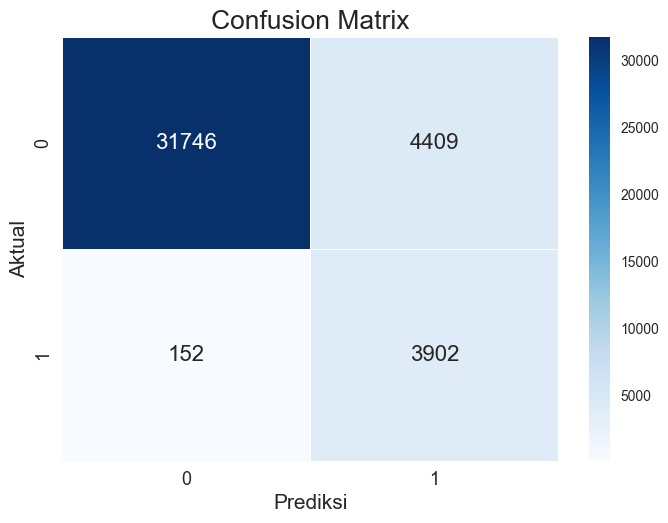

In [941]:
cnf_matrix = confusion_matrix(y, y_pred)
print(classification_report(y, y_pred))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,linewidth=0.5,fmt='d',annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=19)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Prediksi',fontsize=15)
plt.ylabel('Aktual', fontsize=15)
plt.show()

In [942]:
cm_df = pd.DataFrame(cnf_matrix)

In [957]:
approached_cust = cm_df[1][0]+cm_df[1][1]
approached_cust

8311

In [958]:
conversion_rate = round(cm_df[1][1]/(cm_df[1][0]+cm_df[1][1]) * 100,2)
conversion_rate

46.95

In [959]:
avg_cost_per_call = 7.7 #EUR
campaign_cost = cm_df[1].sum() * avg_cost_per_call
campaign_cost

63994.700000000004

In [960]:
income_from_all = 77.5*cm_df[1][1]
income_from_all

302405.0

In [961]:
income_from_all-campaign_cost

238410.3

In [962]:
roi = (income_from_all-campaign_cost) / campaign_cost * 100
roi

372.54694529390713